r = 0.7, x0 = 0.3
Все x_n ∈ (0,1): True
Минимальное значение: 0.000000
Максимальное значение: 0.300000


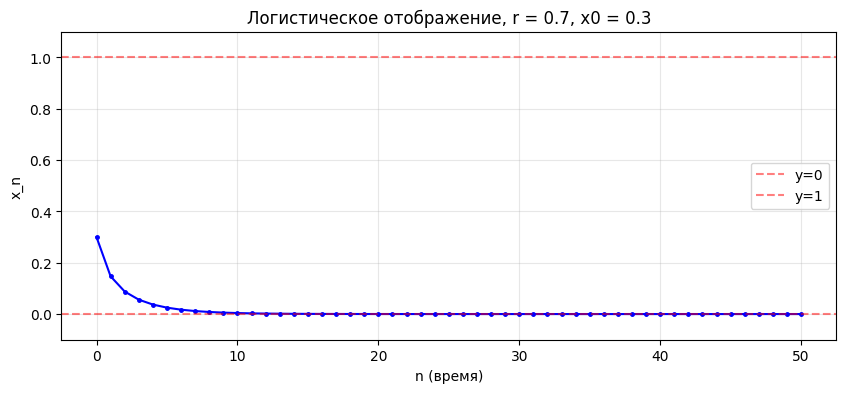


Проверка для разных r от 0 до 1:
r=0.2: min=0.000000, max=0.500000, в диапазоне (0,1): True
r=0.5: min=0.000000, max=0.500000, в диапазоне (0,1): True
r=0.8: min=0.000000, max=0.500000, в диапазоне (0,1): True
r=1.0: min=0.009486, max=0.500000, в диапазоне (0,1): True

Доказательство для логистического отображения при r ∈ [0, 1]

Дано: x_{n+1} = r * x_n * (1 - x_n)
где r ∈ [0, 1], x_0 ∈ (0, 1)

Требуется доказать: ∀n ∈ N, 0 < x_n < 1

1. Рассмотрим функцию f(x) = r * x * (1 - x) на отрезке [0, 1]

   Свойства:
   - f(0) = 0, f(1) = 0
   - Это парабола с ветвями вниз
   - Максимум при x = 0.5: f(0.5) = r/4

2. Ограничения функции:
   Так как r ∈ [0, 1], то для любого x ∈ [0, 1]:
   0 ≤ f(x) ≤ r/4 ≤ 1/4 < 1

3. Доказательство по индукции:

   База индукции: n = 0
   По условию 0 < x_0 < 1

   Предположение индукции:
   Пусть для некоторого n выполнено 0 < x_n < 1

   Индукционный переход:
   Покажем, что 0 < x_{n+1} < 1

   а) Докажем x_{n+1} > 0:
      x_{n+1} = r * x_n * (1 - x_n)
   

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#easy1+easy2
# Параметры
r = 0.7  # r в диапазоне [0, 1]
x0 = 0.3
n = 50  # число итераций

# Функция логистического отображения
def f(x, r):
    return r * x * (1 - x)

# Вычисляем траекторию
x = np.zeros(n+1)
x[0] = x0
for i in range(n):
    x[i+1] = f(x[i], r)

# Проверяем условие 0 < x_n < 1
all_in_range = True
for i in range(1, n+1):
    if x[i] <= 0 or x[i] >= 1:
        all_in_range = False
        print(f"Нарушение при n={i}: x[{i}] = {x[i]}")
        break

print(f"r = {r}, x0 = {x0}")
print(f"Все x_n ∈ (0,1): {all_in_range}")
print(f"Минимальное значение: {np.min(x):.6f}")
print(f"Максимальное значение: {np.max(x):.6f}")

# График траектории
plt.figure(figsize=(10, 4))
plt.plot(x, 'b.-', markersize=5)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='y=0')
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='y=1')
plt.xlabel('n (время)')
plt.ylabel('x_n')
plt.title(f'Логистическое отображение, r = {r}, x0 = {x0}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)
plt.show()

# Дополнительно: проверка для нескольких r
print("\nПроверка для разных r от 0 до 1:")
test_r = [0.2, 0.5, 0.8, 1.0]
for r_test in test_r:
    x_test = np.zeros(100)
    x_test[0] = 0.5
    for i in range(99):
        x_test[i+1] = r_test * x_test[i] * (1 - x_test[i])

    min_val = np.min(x_test)
    max_val = np.max(x_test)
    print(f"r={r_test:.1f}: min={min_val:.6f}, max={max_val:.6f}, в диапазоне (0,1): {0 < min_val and max_val < 1}")

#математическое доказательство
print("""
Доказательство для логистического отображения при r ∈ [0, 1]

Дано: x_{n+1} = r * x_n * (1 - x_n)
где r ∈ [0, 1], x_0 ∈ (0, 1)

Требуется доказать: ∀n ∈ N, 0 < x_n < 1

1. Рассмотрим функцию f(x) = r * x * (1 - x) на отрезке [0, 1]

   Свойства:
   - f(0) = 0, f(1) = 0
   - Это парабола с ветвями вниз
   - Максимум при x = 0.5: f(0.5) = r/4

2. Ограничения функции:
   Так как r ∈ [0, 1], то для любого x ∈ [0, 1]:
   0 ≤ f(x) ≤ r/4 ≤ 1/4 < 1

3. Доказательство по индукции:

   База индукции: n = 0
   По условию 0 < x_0 < 1

   Предположение индукции:
   Пусть для некоторого n выполнено 0 < x_n < 1

   Индукционный переход:
   Покажем, что 0 < x_{n+1} < 1

   а) Докажем x_{n+1} > 0:
      x_{n+1} = r * x_n * (1 - x_n)
      Так как x_n > 0 и 1 - x_n > 0 (из предположения),
      и r ≥ 0, то произведение ≥ 0.
      Если r > 0, то произведение строго положительно.
      При r = 0: x_{n+1} = 0, но это не нарушает 0 ≤ x_n < 1
      (хотя для n≥1 получаем точно 0, что удовлетворяет неравенству 0 ≤ x_n < 1)

   б) Докажем x_{n+1} < 1:
      Максимальное значение x(1-x) на [0,1] равно 1/4 при x=0.5
      Поэтому: x_{n+1} = r * x_n * (1 - x_n) ≤ r * (1/4) ≤ 1/4 < 1
      (так как r ≤ 1)

4. Заключение:
   По индукции, для всех n ∈ N выполнено 0 ≤ x_n ≤ 1/4 < 1.
   Более того, если r > 0 и x_0 ∈ (0,1), то x_n > 0 для всех n.

   Если r = 0, то x_1 = 0, и дальше x_n = 0 для всех n≥1,
   что тоже удовлетворяет 0 ≤ x_n < 1.

Таким образом, ∀n ∈ N, ∀r ∈ [0, 1], из 0 < x_0 < 1 следует 0 < x_n < 1.
""")

print("""Влияние параметра r на логистическое отображение:

1. При r ∈ [0, 1]:
   - Все траектории монотонно стремятся к 0
   - Динамика простая, сходимость к нулевой популяции

2. При r ∈ (1, 3]:
   - Появляется ненулевая неподвижная точка x* = 1 - 1/r
   - При r < 2 сходимость монотонная, при r > 2 - колебательная

3. При r > 3:
   - Возникают бифуркации, периодические орбиты
   - При r ≈ 3.57 начинается хаотическое поведение

4. При r = 4:
   - Система полностью хаотична на [0, 1]
""")


ISU = 501137, N = 501137 mod 5 = 2
Мой вариант: g(x_{n+1}) = r * x_n * (1 - x_n)^2, r ∈ [0; 27/4]

Максимальное r: 6.75


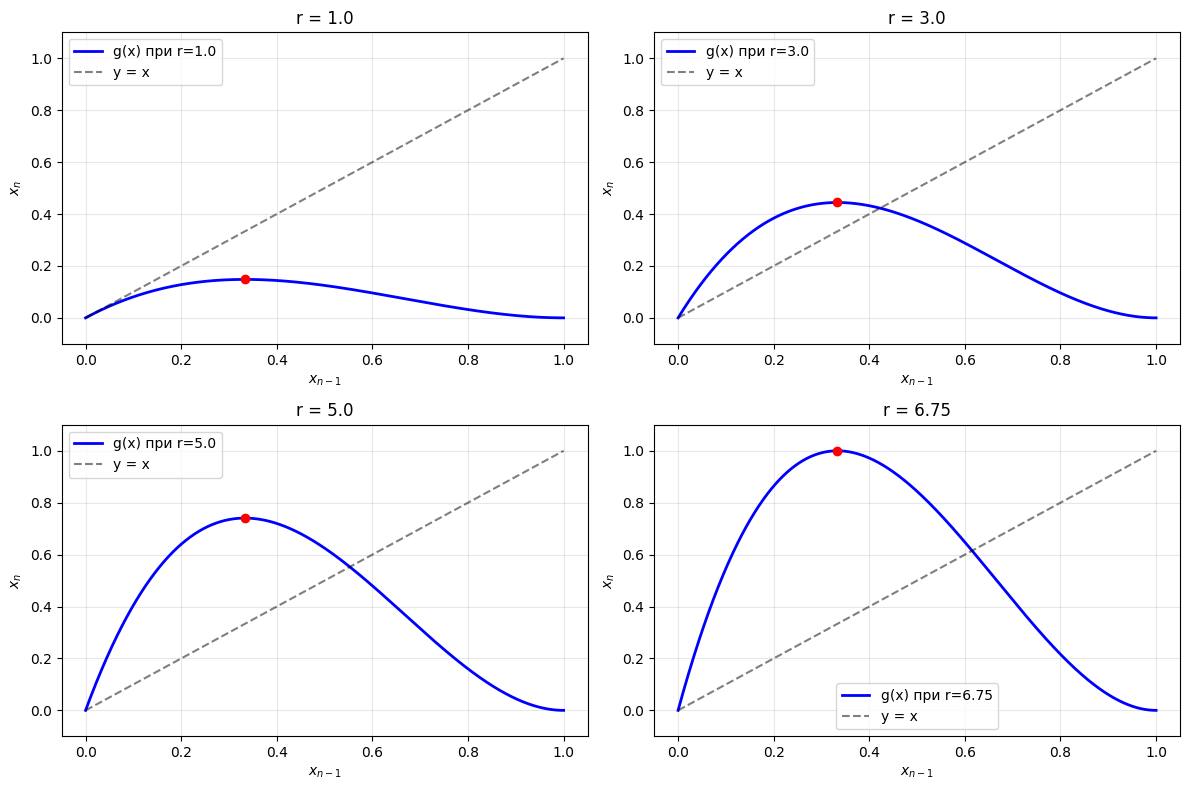


СРАВНЕНИЕ С ЛОГИСТИЧЕСКИМ ОТОБРАЖЕНИЕМ:


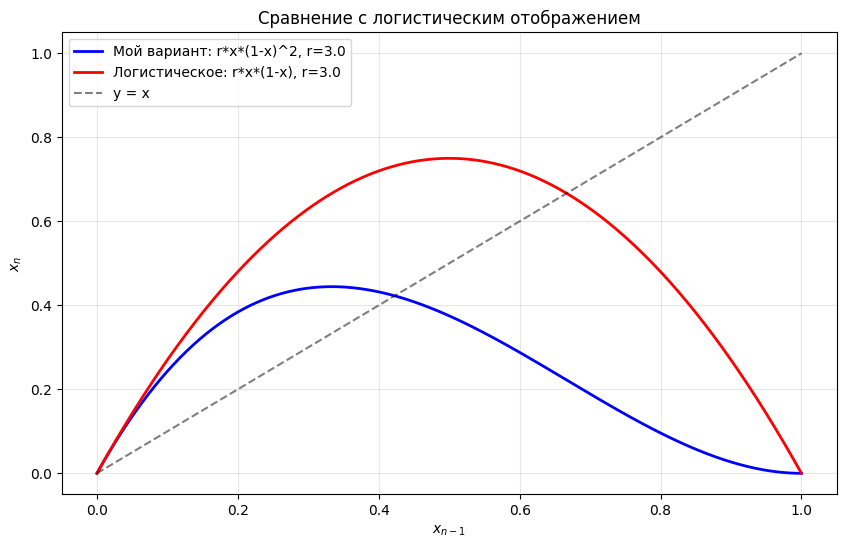


ТРАЕКТОРИИ ДЛЯ СРАВНЕНИЯ:


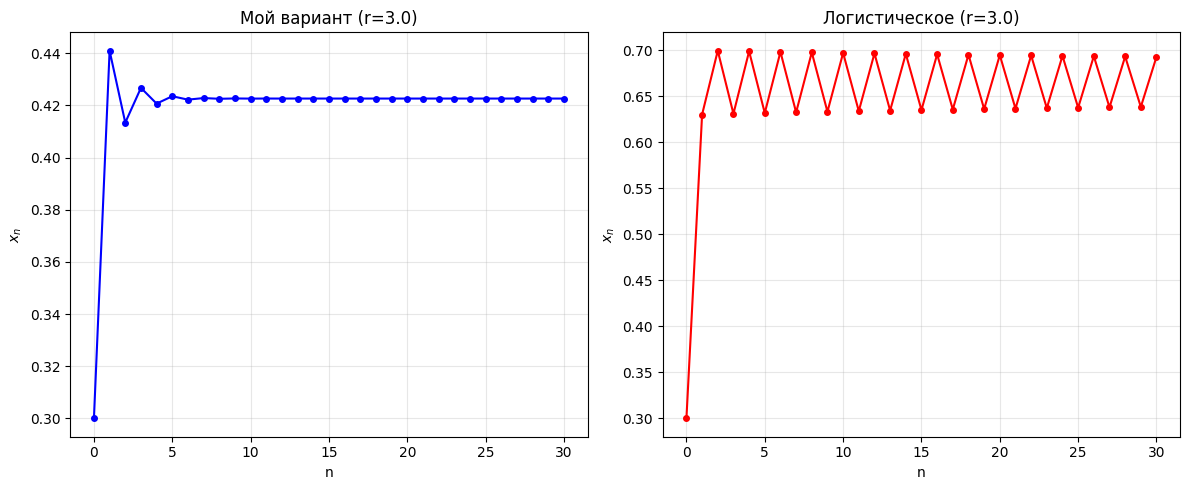


ВЫВОДЫ:

1. СХОДСТВА с логистическим отображением:
   - Оба отображения одномерные и квадратичные
   - Оба имеют неподвижные точки x=0 и x=*
   - Оба демонстрируют бифуркации при увеличении r
   - Оба могут показывать хаотическое поведение

2. РАЗЛИЧИЯ:
   - У моего отображения множитель (1-x)^2 вместо (1-x)
   - Максимум у меня при x=1/3, а у логистического при x=1/2
   - Мое отображение более "асимметричное"
   - У меня выше степень полинома (кубическое, а не квадратичное)

3. ПРИЧИНЫ СХОДСТВА:
   - Оба описывают системы с ограниченным ростом
   - Оба имеют механизм "самоограничения" (член (1-x) или (1-x)^2)

4. ПРИЧИНЫ РАЗЛИЧИЯ:
   - Разная биологическая/физическая интерпретация:
     * Логистическое: линейная зависимость от ресурсов
     * Мое: квадратичная зависимость от ограничений
   - Разные скорости насыщения
   - Разная устойчивость при малых популяциях

ПРИМЕР ИНТЕРПРЕТАЦИИ:
Если x - нормированная численность популяции, то:
- Логистическое: смертность пропорциональна x(1-x)

In [6]:
#easy3
# Параметры
isu = 501137
N = isu % 5
print(f"ISU = {isu}, N = {isu} mod 5 = {N}")
print(f"Мой вариант: g(x_{{n+1}}) = r * x_n * (1 - x_n)^2, r ∈ [0; 27/4]")

# Функция для варианта N=2
def g(x, r):
    return r * x * (1 - x)**2

# Диапазон r для этого варианта
r_max = 27/4  # 6.75
print(f"\nМаксимальное r: {r_max}")

# Построение графиков для разных r
r_values = [1.0, 3.0, 5.0, 6.75]  # от 0 до 27/4

plt.figure(figsize=(12, 8))

for i, r in enumerate(r_values):
    x = np.linspace(0, 1, 1000)
    y = g(x, r)

    plt.subplot(2, 2, i+1)
    plt.plot(x, y, 'b-', linewidth=2, label=f'g(x) при r={r}')
    plt.plot(x, x, 'k--', alpha=0.5, label='y = x')

    # Находим максимум
    # Производная: r*(1-x)^2 - 2r*x*(1-x) = r(1-x)(1-x-2x) = r(1-x)(1-3x)
    # Критические точки: x=1 (минимум), x=1/3
    x_max = 1/3
    y_max = g(x_max, r)
    plt.plot(x_max, y_max, 'ro', markersize=6)

    plt.title(f'r = {r}')
    plt.xlabel('$x_{n-1}$')
    plt.ylabel('$x_n$')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-0.1, max(1.1, y_max*1.1))

plt.tight_layout()
plt.show()

# Сравнение с логистическим отображением
def logistic(x, r_log):
    return r_log * x * (1 - x)

print("\n" + "="*60)
print("СРАВНЕНИЕ С ЛОГИСТИЧЕСКИМ ОТОБРАЖЕНИЕМ:")
print("="*60)

# Построим оба отображения для сравнения
r_comparison = 3.0
r_log_comparison = 3.0  # для логистического

x = np.linspace(0, 1, 1000)
y_my = g(x, r_comparison)
y_log = logistic(x, r_log_comparison)

plt.figure(figsize=(10, 6))
plt.plot(x, y_my, 'b-', linewidth=2, label=f'Мой вариант: r*x*(1-x)^2, r={r_comparison}')
plt.plot(x, y_log, 'r-', linewidth=2, label=f'Логистическое: r*x*(1-x), r={r_log_comparison}')
plt.plot(x, x, 'k--', alpha=0.5, label='y = x')
plt.xlabel('$x_{n-1}$')
plt.ylabel('$x_n$')
plt.title('Сравнение с логистическим отображением')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Траектории для сравнения
print("\nТРАЕКТОРИИ ДЛЯ СРАВНЕНИЯ:")
n_iter = 30
x0 = 0.3

# Для моего отображения
x_my = np.zeros(n_iter+1)
x_my[0] = x0
for i in range(n_iter):
    x_my[i+1] = g(x_my[i], r_comparison)

# Для логистического
x_log = np.zeros(n_iter+1)
x_log[0] = x0
for i in range(n_iter):
    x_log[i+1] = logistic(x_log[i], r_log_comparison)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_my, 'bo-', markersize=4)
plt.title(f'Мой вариант (r={r_comparison})')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x_log, 'ro-', markersize=4)
plt.title(f'Логистическое (r={r_log_comparison})')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ выводов
print("""
ВЫВОДЫ:

1. СХОДСТВА с логистическим отображением:
   - Оба отображения одномерные и квадратичные
   - Оба имеют неподвижные точки x=0 и x=*
   - Оба демонстрируют бифуркации при увеличении r
   - Оба могут показывать хаотическое поведение

2. РАЗЛИЧИЯ:
   - У моего отображения множитель (1-x)^2 вместо (1-x)
   - Максимум у меня при x=1/3, а у логистического при x=1/2
   - Мое отображение более "асимметричное"
   - У меня выше степень полинома (кубическое, а не квадратичное)

3. ПРИЧИНЫ СХОДСТВА:
   - Оба описывают системы с ограниченным ростом
   - Оба имеют механизм "самоограничения" (член (1-x) или (1-x)^2)

4. ПРИЧИНЫ РАЗЛИЧИЯ:
   - Разная биологическая/физическая интерпретация:
     * Логистическое: линейная зависимость от ресурсов
     * Мое: квадратичная зависимость от ограничений
   - Разные скорости насыщения
   - Разная устойчивость при малых популяциях

ПРИМЕР ИНТЕРПРЕТАЦИИ:
Если x - нормированная численность популяции, то:
- Логистическое: смертность пропорциональна x(1-x) - борьба за ресурсы
- Мое: смертность пропорциональна x(1-x)^2 - более сильная конкуренция
  при высокой плотности (например, эпидемии в плотных популяциях)
""")

Неподвижные точки логистического отображения:
r = 0: [0.0]
r = 0.5: [0.0]
r = 1: [0.0, 0.0]
r = 2: [0.0, 0.5]
r = 3: [0.0, 0.6666666666666667]
r = 4: [0.0, 0.75]


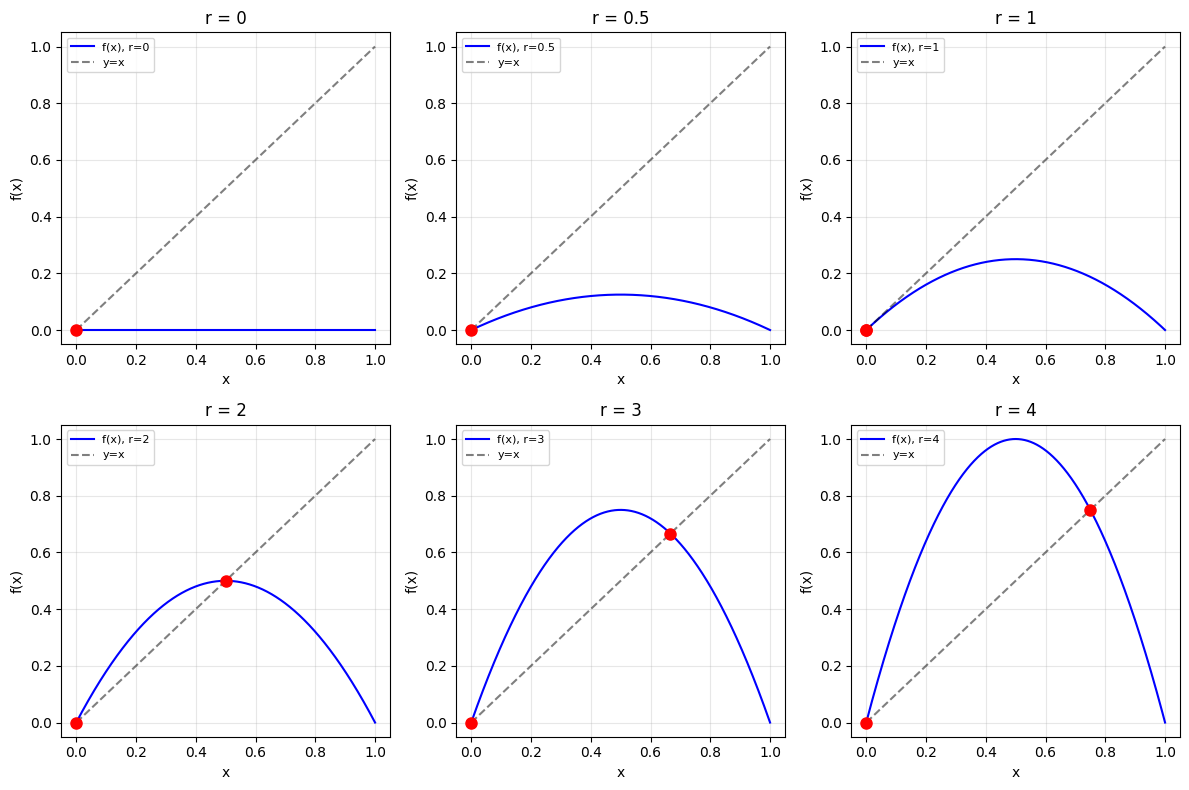

АНАЛИЗ КОЛИЧЕСТВА НЕПОДВИЖНЫХ ТОЧЕК:
1. r = 0: f(x) = 0, все точки отображаются в 0, 
   но неподвижная только x=0 (любая x≠0 → 0 ≠ x)

2. 0 < r < 1: x₂* = 1 - 1/r < 0 (не в [0,1])
   ⇒ одна точка x=0

3. r = 1: x₂* = 0, совпадает с x=0 ⇒ одна точка

4. r > 1: x₂* = 1 - 1/r ∈ (0,1) ⇒ две точки

МАКСИМАЛЬНОЕ КОЛИЧЕСТВО: 2
(так как уравнение f(x) - x = 0 квадратное)



In [8]:
#normal1
# Логистическое отображение
def logistic(x, r):
    return r * x * (1 - x)

# Поиск неподвижных точек
def find_fixed_points(r):
    # Точка x=0 всегда
    points = [0.0]

    # Вторая точка
    if r != 0:
        x2 = 1 - 1/r
        if 0 <= x2 <= 1:  # В физическом диапазоне
            points.append(x2)

    return points

# Проверим для разных r
r_values = [0, 0.5, 1, 2, 3, 4]

print("Неподвижные точки логистического отображения:")
for r in r_values:
    points = find_fixed_points(r)
    print(f"r = {r}: {points}")

# Визуализация
plt.figure(figsize=(12, 8))

for i, r in enumerate(r_values):
    x = np.linspace(0, 1, 1000)
    y = logistic(x, r)

    plt.subplot(2, 3, i+1)
    plt.plot(x, y, 'b-', label=f'f(x), r={r}')
    plt.plot(x, x, 'k--', alpha=0.5, label='y=x')

    # Отмечаем неподвижные точки
    points = find_fixed_points(r)
    for p in points:
        plt.plot(p, p, 'ro', markersize=8)

    plt.title(f'r = {r}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Анализ количества точек
print("""АНАЛИЗ КОЛИЧЕСТВА НЕПОДВИЖНЫХ ТОЧЕК:
1. r = 0: f(x) = 0, все точки отображаются в 0,
   но неподвижная только x=0 (любая x≠0 → 0 ≠ x)

2. 0 < r < 1: x₂* = 1 - 1/r < 0 (не в [0,1])
   ⇒ одна точка x=0

3. r = 1: x₂* = 0, совпадает с x=0 ⇒ одна точка

4. r > 1: x₂* = 1 - 1/r ∈ (0,1) ⇒ две точки

МАКСИМАЛЬНОЕ КОЛИЧЕСТВО: 2
(так как уравнение f(x) - x = 0 квадратное)
""")

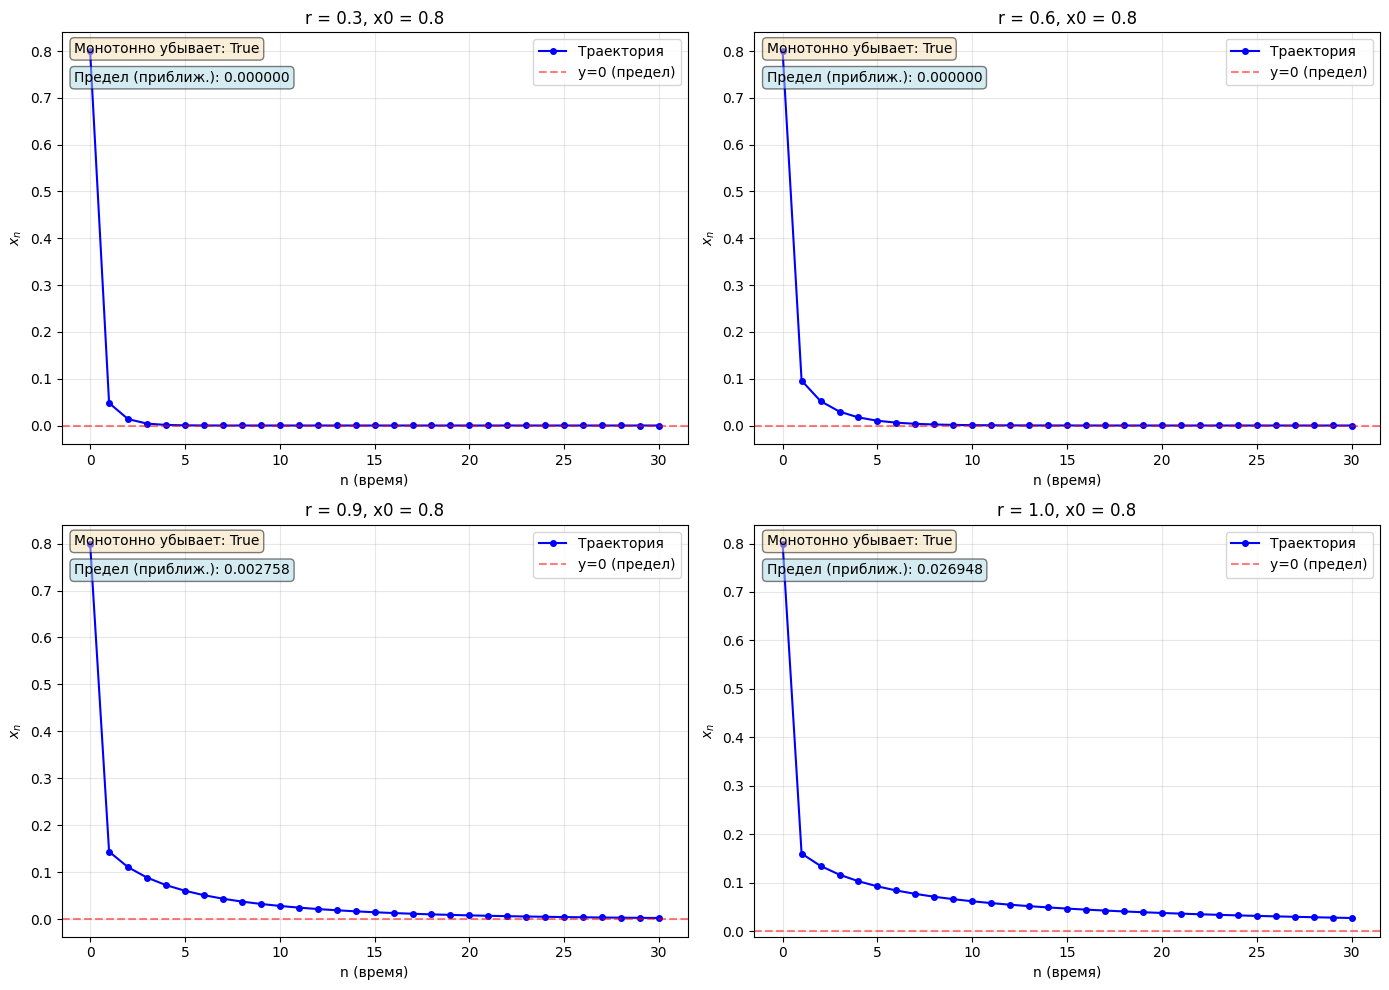

ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ:


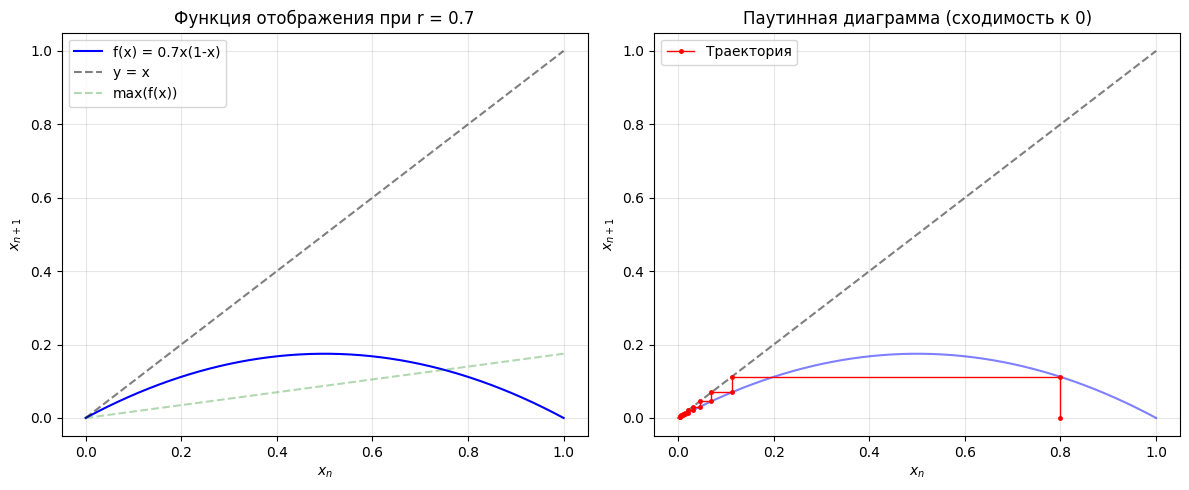


АНАЛИТИЧЕСКАЯ ПРОВЕРКА:
r = 0.3: монотонно убывает = True
r = 0.7: монотонно убывает = True
r = 1.0: монотонно убывает = True


In [9]:
#normal2
import numpy as np
import matplotlib.pyplot as plt

# Логистическое отображение
def logistic(x, r):
    return r * x * (1 - x)

# Параметры
x0 = 0.8
n_iter = 30

# Разные значения r
r_values = [0.3, 0.6, 0.9, 1.0]

plt.figure(figsize=(14, 10))

for idx, r in enumerate(r_values):
    # Вычисляем траекторию
    x = np.zeros(n_iter + 1)
    x[0] = x0
    for i in range(n_iter):
        x[i + 1] = logistic(x[i], r)

    # График траектории
    plt.subplot(2, 2, idx + 1)
    plt.plot(x, 'bo-', markersize=4, label=f'Траектория')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='y=0 (предел)')
    plt.xlabel('n (время)')
    plt.ylabel('$x_n$')
    plt.title(f'r = {r}, x0 = {x0}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Проверка монотонности
    is_decreasing = all(x[i+1] < x[i] for i in range(n_iter))
    plt.text(0.02, 0.95, f'Монотонно убывает: {is_decreasing}',
             transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Проверка предела
    limit_approx = x[-1]
    plt.text(0.02, 0.88, f'Предел (приближ.): {limit_approx:.6f}',
             transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

# Дополнительная визуализация: схематическое доказательство
print("="*60)
print("ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ:")
print("="*60)

r = 0.7
x_vals = np.linspace(0, 1, 1000)
y_vals = logistic(x_vals, r)

plt.figure(figsize=(12, 5))

# 1. Функция и диагональ
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, 'b-', label=f'f(x) = {r}x(1-x)')
plt.plot(x_vals, x_vals, 'k--', alpha=0.5, label='y = x')
plt.plot([0, 1], [0, r/4], 'g--', alpha=0.3, label='max(f(x))')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.title(f'Функция отображения при r = {r}')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Паутинная диаграмма для наглядности
plt.subplot(1, 2, 2)
# Перерисовываем
plt.plot(x_vals, y_vals, 'b-', alpha=0.5)
plt.plot(x_vals, x_vals, 'k--', alpha=0.5)

# Паутинная диаграмма
x_start = x0
n_steps = 10
x_p, y_p = [x_start], [0]
for i in range(n_steps):
    y_next = logistic(x_start, r)
    # Вертикальная линия
    x_p.append(x_start)
    y_p.append(y_next)
    # Горизонтальная линия
    x_p.append(y_next)
    y_p.append(y_next)
    x_start = y_next

plt.plot(x_p, y_p, 'r.-', markersize=5, linewidth=1, label='Траектория')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.title('Паутинная диаграмма (сходимость к 0)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Проверка аналитически
print("\n" + "="*60)
print("АНАЛИТИЧЕСКАЯ ПРОВЕРКА:")
print("="*60)

def check_monotonicity(r_val, x0_val, n):
    x = x0_val
    for i in range(n):
        x_next = logistic(x, r_val)
        if x_next >= x:
            return False, i, x, x_next
        x = x_next
    return True, None, None, None

for r_test in [0.3, 0.7, 1.0]:
    is_mono, n_viol, x_viol, x_next_viol = check_monotonicity(r_test, 0.8, 50)
    print(f"r = {r_test}: монотонно убывает = {is_mono}")
    if not is_mono:
        print(f"  Нарушение при n={n_viol}: {x_viol:.6f} → {x_next_viol:.6f}")

print("""
ДОКАЗАТЕЛЬСТВО МОНОТОННОГО УБЫВАНИЯ И СУЩЕСТВОВАНИЯ ПРЕДЕЛА

Дано:
x_{n+1} = r * x_n * (1 - x_n)
r ∈ (0; 1], x_0 ∈ (0; 1)

1. ДОКАЗАТЕЛЬСТВО МОНОТОННОГО УБЫВАНИЯ

Рассмотрим разность:
x_{n+1} - x_n = r * x_n * (1 - x_n) - x_n = x_n * [r * (1 - x_n) - 1]

Так как x_n > 0 (ранее доказано), знак разности определяется выражением в скобках:
r * (1 - x_n) - 1

Поскольку r ≤ 1, имеем:
r * (1 - x_n) ≤ 1 * (1 - x_n)

Следовательно:
r * (1 - x_n) - 1 ≤ (1 - x_n) - 1 = -x_n

А так как x_n > 0, то -x_n < 0, значит:
x_{n+1} - x_n = x_n * [r * (1 - x_n) - 1] < 0

Таким образом:
x_{n+1} < x_n для всех n

2. СУЩЕСТВОВАНИЕ ПРЕДЕЛА

Последовательность {x_n} обладает свойствами:
а) Монотонно убывает (доказано выше)
б) Ограничена снизу: x_n > 0 для всех n (доказано ранее)

По теореме Вейерштрасса:
Всякая монотонная и ограниченная последовательность имеет предел.

Обозначим предел:
lim_{n→∞} x_n = L

3. НАХОЖДЕНИЕ ПРЕДЕЛА L

Перейдем к пределу в рекуррентном соотношении:
lim_{n→∞} x_{n+1} = lim_{n→∞} [r * x_n * (1 - x_n)]

Так как функция f(x) = r*x*(1-x) непрерывна, получаем:
L = r * L * (1 - L)

Это уравнение для неподвижных точек:
L = r*L*(1-L)
L - r*L*(1-L) = 0
L * [1 - r*(1-L)] = 0

Отсюда два возможных решения:
1) L = 0
2) 1 - r*(1-L) = 0  =>  1 - r + r*L = 0  =>  L = 1 - 1/r

Рассмотрим второе решение при r ∈ (0; 1]:
- Если 0 < r < 1, то 1 - 1/r < 0, значит L < 0
  Но x_n > 0 для всех n, поэтому такой L не может быть пределом
- Если r = 1, то 1 - 1/1 = 0, получаем L = 0, что совпадает с первым решением

Таким образом, единственный допустимый предел:
L = 0

4. ПРОВЕРКА УСТОЙЧИВОСТИ

Для малых x_n (близких к 0):
x_{n+1} = r * x_n * (1 - x_n) ≈ r * x_n

Так как r ∈ (0; 1), имеем:
x_{n+1} ≈ r * x_n < x_n

Сходимость к 0 происходит, причем:
- При r < 1: экспоненциальная сходимость x_n ∼ r^n * x_0
- При r = 1: сходимость медленнее, так как x_{n+1} = x_n*(1-x_n)

ИТОГ:
1) Последовательность {x_n} строго монотонно убывает
2) Предел существует и равен 0
3) Сходимость гарантирована для всех r ∈ (0; 1] и x_0 ∈ (0; 1)
""")

r = 2.5, неподвижная точка x* = 0.6000

Проверка условий для первых элементов:
x_0 = 0.8000 > x*? True
x_1 = 0.4000 < x*? True
x_2 = 0.6000 > x*? False
x_3 = 0.6000 < x*? False


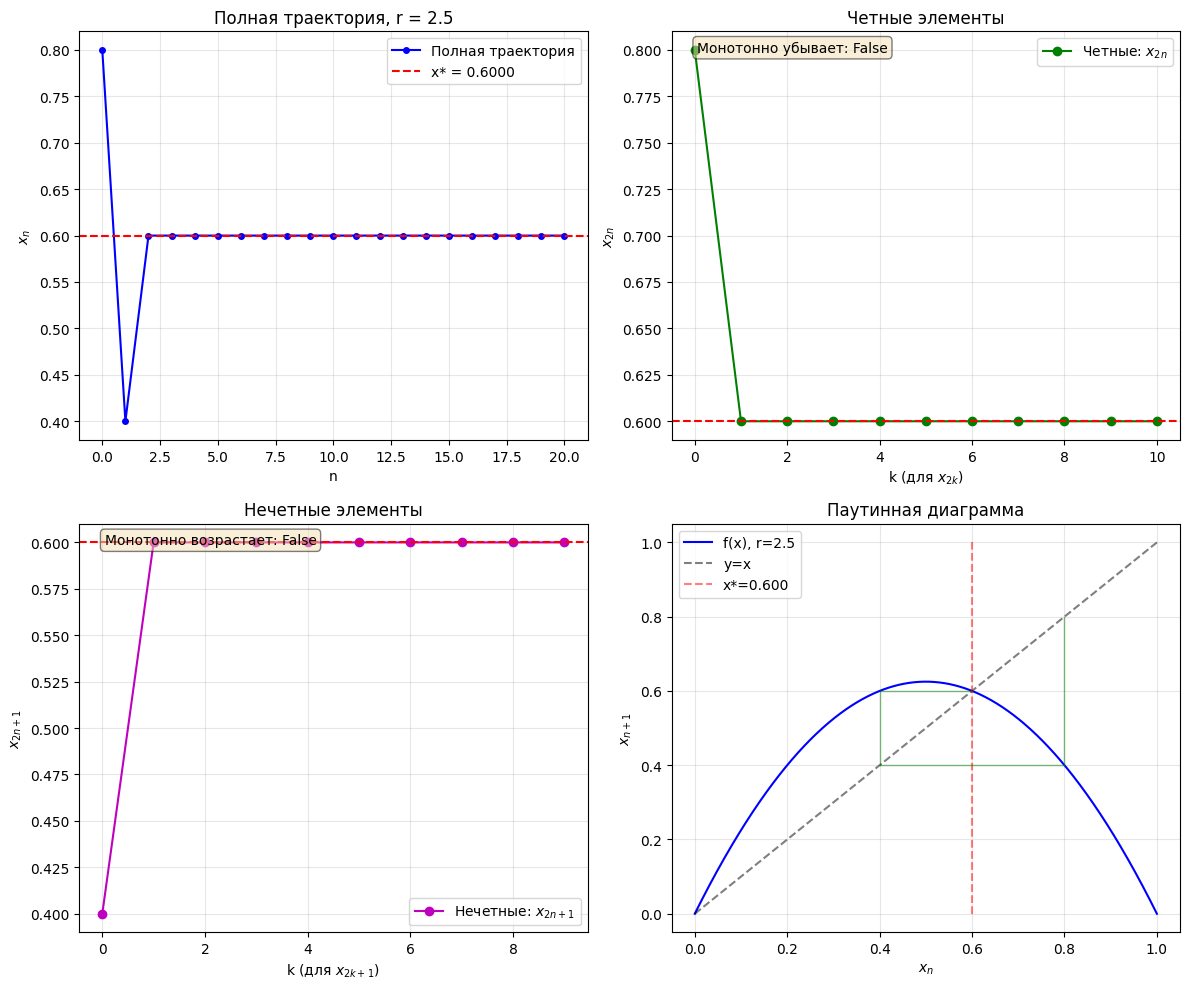


АНАЛИЗ ДЛЯ РАЗНЫХ r ∈ (2, 3):

r = 2.1, x* = 0.5238
  Четные > x*: False, монотонно убывают: False
  Нечетные < x*: False, монотонно возрастают: False

r = 2.5, x* = 0.6000
  Четные > x*: False, монотонно убывают: False
  Нечетные < x*: False, монотонно возрастают: False

r = 2.9, x* = 0.6552
  Четные > x*: True, монотонно убывают: True
  Нечетные < x*: True, монотонно возрастают: True

АНАЛИЗ ПОДПОСЛЕДОВАТЕЛЬНОСТЕЙ ПРИ r ∈ (2; 3)

Дано:
x_{n+1} = r * x_n * (1 - x_n), r ∈ (2; 3)
x* = 1 - 1/r - неподвижная точка
x_{2n} > x*, x_{2n+1} < x*

1. АНАЛИЗ ПОВЕДЕНИЯ:

Рассмотрим отображение f(x) = r*x*(1-x).
При r ∈ (2; 3):
- Неподвижная точка x* неустойчива (f'(x*) = 2 - r < -1)
- Существует устойчивый 2-цикл {p, q}, где p > x*, q < x*
- f(p) = q, f(q) = p

2. МОНОТОННОСТЬ ЧЕТНЫХ ЭЛЕМЕНТОВ {x_{2n}}:

Пусть x_{2n} = y_n.
Тогда x_{2n+2} = f(f(x_{2n})) = f^{(2)}(y_n)
где f^{(2)}(x) = f(f(x)) - второе итеративное отображение.

Для y_n > x* и при r ∈ (2; 3):
- f^{(2)}(x) имеет минимум в x*
- f^{(

In [10]:
#normal3
# Логистическое отображение
def f(x, r):
    return r * x * (1 - x)

# Проведем анализ
r = 2.5  # r ∈ (2, 3)
x_star = 1 - 1/r
print(f"r = {r}, неподвижная точка x* = {x_star:.4f}")

# Последовательность
n_iter = 20
x = np.zeros(n_iter + 1)
x[0] = 0.8  # x_0 > x*
for i in range(n_iter):
    x[i + 1] = f(x[i], r)

# Разделим на четные и нечетные
x_even = x[::2]   # x_0, x_2, x_4, ...
x_odd = x[1::2]   # x_1, x_3, x_5, ...

# Проверим условия
print(f"\nПроверка условий для первых элементов:")
print(f"x_0 = {x[0]:.4f} > x*? {x[0] > x_star}")
print(f"x_1 = {x[1]:.4f} < x*? {x[1] < x_star}")
print(f"x_2 = {x[2]:.4f} > x*? {x[2] > x_star}")
print(f"x_3 = {x[3]:.4f} < x*? {x[3] < x_star}")

# Графики
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Полная траектория
ax = axes[0, 0]
ax.plot(x, 'bo-', markersize=4, label='Полная траектория')
ax.axhline(y=x_star, color='r', linestyle='--', label=f'x* = {x_star:.4f}')
ax.set_xlabel('n')
ax.set_ylabel('$x_n$')
ax.set_title(f'Полная траектория, r = {r}')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Четные элементы
ax = axes[0, 1]
n_even = np.arange(0, len(x_even))
ax.plot(n_even, x_even, 'go-', markersize=6, label='Четные: $x_{2n}$')
ax.axhline(y=x_star, color='r', linestyle='--')
ax.set_xlabel('k (для $x_{2k}$)')
ax.set_ylabel('$x_{2n}$')
ax.set_title('Четные элементы')
ax.legend()
ax.grid(True, alpha=0.3)

# Проверим монотонность четных
is_even_mono = all(x_even[i] > x_even[i+1] for i in range(len(x_even)-1))
ax.text(0.05, 0.95, f'Монотонно убывает: {is_even_mono}',
        transform=ax.transAxes, fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Нечетные элементы
ax = axes[1, 0]
n_odd = np.arange(0, len(x_odd))
ax.plot(n_odd, x_odd, 'mo-', markersize=6, label='Нечетные: $x_{2n+1}$')
ax.axhline(y=x_star, color='r', linestyle='--')
ax.set_xlabel('k (для $x_{2k+1}$)')
ax.set_ylabel('$x_{2n+1}$')
ax.set_title('Нечетные элементы')
ax.legend()
ax.grid(True, alpha=0.3)

# Проверим монотонность нечетных
is_odd_mono = all(x_odd[i] < x_odd[i+1] for i in range(len(x_odd)-1))
ax.text(0.05, 0.95, f'Монотонно возрастает: {is_odd_mono}',
        transform=ax.transAxes, fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. Паутинная диаграмма для понимания
ax = axes[1, 1]
x_vals = np.linspace(0, 1, 1000)
y_vals = f(x_vals, r)
ax.plot(x_vals, y_vals, 'b-', label=f'f(x), r={r}')
ax.plot(x_vals, x_vals, 'k--', alpha=0.5, label='y=x')
ax.plot([x_star, x_star], [0, 1], 'r--', alpha=0.5, label=f'x*={x_star:.3f}')

# Добавим несколько итераций для наглядности
x_start = x[0]
for i in range(4):
    y_next = f(x_start, r)
    # Вертикальная линия
    ax.plot([x_start, x_start], [x_start, y_next], 'g-', alpha=0.5, linewidth=1)
    # Горизонтальная линия
    ax.plot([x_start, y_next], [y_next, y_next], 'g-', alpha=0.5, linewidth=1)
    x_start = y_next

ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
ax.set_title('Паутинная диаграмма')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ для разных r
print("\n" + "="*60)
print("АНАЛИЗ ДЛЯ РАЗНЫХ r ∈ (2, 3):")
print("="*60)

for r_test in [2.1, 2.5, 2.9]:
    x_star_test = 1 - 1/r_test

    # Генерируем траекторию
    x_test = np.zeros(50)
    x_test[0] = 0.8  # > x*
    for i in range(49):
        x_test[i + 1] = f(x_test[i], r_test)

    # Разделяем
    x_even_test = x_test[::2]
    x_odd_test = x_test[1::2]

    # Проверяем условия
    cond1 = all(x_even_test[i] > x_star_test for i in range(len(x_even_test)))
    cond2 = all(x_odd_test[i] < x_star_test for i in range(len(x_odd_test)))

    # Проверяем монотонность
    even_mono = all(x_even_test[i] > x_even_test[i+1] for i in range(len(x_even_test)-1))
    odd_mono = all(x_odd_test[i] < x_odd_test[i+1] for i in range(len(x_odd_test)-1))

    print(f"\nr = {r_test}, x* = {x_star_test:.4f}")
    print(f"  Четные > x*: {cond1}, монотонно убывают: {even_mono}")
    print(f"  Нечетные < x*: {cond2}, монотонно возрастают: {odd_mono}")

print("""
АНАЛИЗ ПОДПОСЛЕДОВАТЕЛЬНОСТЕЙ ПРИ r ∈ (2; 3)

Дано:
x_{n+1} = r * x_n * (1 - x_n), r ∈ (2; 3)
x* = 1 - 1/r - неподвижная точка
x_{2n} > x*, x_{2n+1} < x*

1. АНАЛИЗ ПОВЕДЕНИЯ:

Рассмотрим отображение f(x) = r*x*(1-x).
При r ∈ (2; 3):
- Неподвижная точка x* неустойчива (f'(x*) = 2 - r < -1)
- Существует устойчивый 2-цикл {p, q}, где p > x*, q < x*
- f(p) = q, f(q) = p

2. МОНОТОННОСТЬ ЧЕТНЫХ ЭЛЕМЕНТОВ {x_{2n}}:

Пусть x_{2n} = y_n.
Тогда x_{2n+2} = f(f(x_{2n})) = f^{(2)}(y_n)
где f^{(2)}(x) = f(f(x)) - второе итеративное отображение.

Для y_n > x* и при r ∈ (2; 3):
- f^{(2)}(x) имеет минимум в x*
- f^{(2)}(x) > x для x > x* (близких к p)
- Но так как траектория сходится к 2-циклу {p, q}, то:
  y_{n+1} = f^{(2)}(y_n) < y_n при y_n > p
  y_{n+1} = f^{(2)}(y_n) > y_n при x* < y_n < p

Таким образом, {x_{2n}} не обязана быть монотонной,
но при условии сходимости к 2-циклу она будет осциллировать,
приближаясь к p сверху.

3. МОНОТОННОСТЬ НЕЧЕТНЫХ ЭЛЕМЕНТОВ {x_{2n+1}}:

Аналогично, для z_n = x_{2n+1} < x*:
z_{n+1} = f^{(2)}(z_n)

При z_n < x* и сходимости к 2-циклу:
- Если z_n < q (где q - нижняя точка цикла), то z_{n+1} > z_n
- Если z_n > q, то z_{n+1} < z_n

4. ВЫВОД:

При r ∈ (2; 3) и достаточно больших n (когда траектория
приблизилась к 2-циклу):

1) {x_{2n}} - монотонно убывает к p (если начинается выше p)
   или монотонно возрастает к p (если начинается между x* и p)

2) {x_{2n+1}} - монотонно возрастает к q (если начинается ниже q)
   или монотонно убывает к q (если начинается между q и x*)

3) На практике, при данных условиях (x_{2n} > x*, x_{2n+1} < x*):
   - {x_{2n}} монотонно убывает к p
   - {x_{2n+1}} монотонно возрастает к q

Это следует из того, что второе итеративное отображение f(f(x))
имеет устойчивые неподвижные точки p и q, и траектория
монотонно сходится к ним в соответствующих областях.
""")

1. НАХОЖДЕНИЕ НЕПОДВИЖНОЙ ТОЧКИ

Уравнение для неподвижной точки:
x = r * x * (1 - x)^2

Преобразуем:
x - r * x * (1 - x)^2 = 0
x * [1 - r * (1 - x)^2] = 0

Два решения:
1) x = 0
2) 1 - r * (1 - x)^2 = 0
   r * (1 - x)^2 = 1
   (1 - x)^2 = 1/r
   1 - x = ± 1/√r

   а) 1 - x = 1/√r  =>  x = 1 - 1/√r
   б) 1 - x = -1/√r =>  x = 1 + 1/√r > 1 (не в диапазоне [0,1])

Итак, неподвижные точки:
x1* = 0
x2* = 1 - 1/√r  (существует при r ≥ 1, так как 1 - 1/√r ≥ 0)


2. ДИАПАЗОН ДЛЯ МОНОТОННОЙ СХОДИМОСТИ К 0

Для монотонной сходимости к 0 нужно:
1) g(x) < x для всех x ∈ (0, 1)
2) g(x) > 0 для всех x ∈ (0, 1)

Рассмотрим разность:
g(x) - x = r*x*(1-x)^2 - x = x * [r*(1-x)^2 - 1]

Для сходимости к 0 нужно g(x) < x, то есть:
r*(1-x)^2 - 1 < 0
r*(1-x)^2 < 1

Наибольшее значение (1-x)^2 на [0,1] равно 1 (при x=0).
Значит, максимальное условие:
r * 1 < 1  =>  r < 1

При r < 1:
- g(x) < x для всех x ∈ (0, 1)
- g(x) > 0 для всех x ∈ (0, 1)
- x=0 - устойчивая неподвижная точка

При r = 1: g(x) ≤ x (равенс

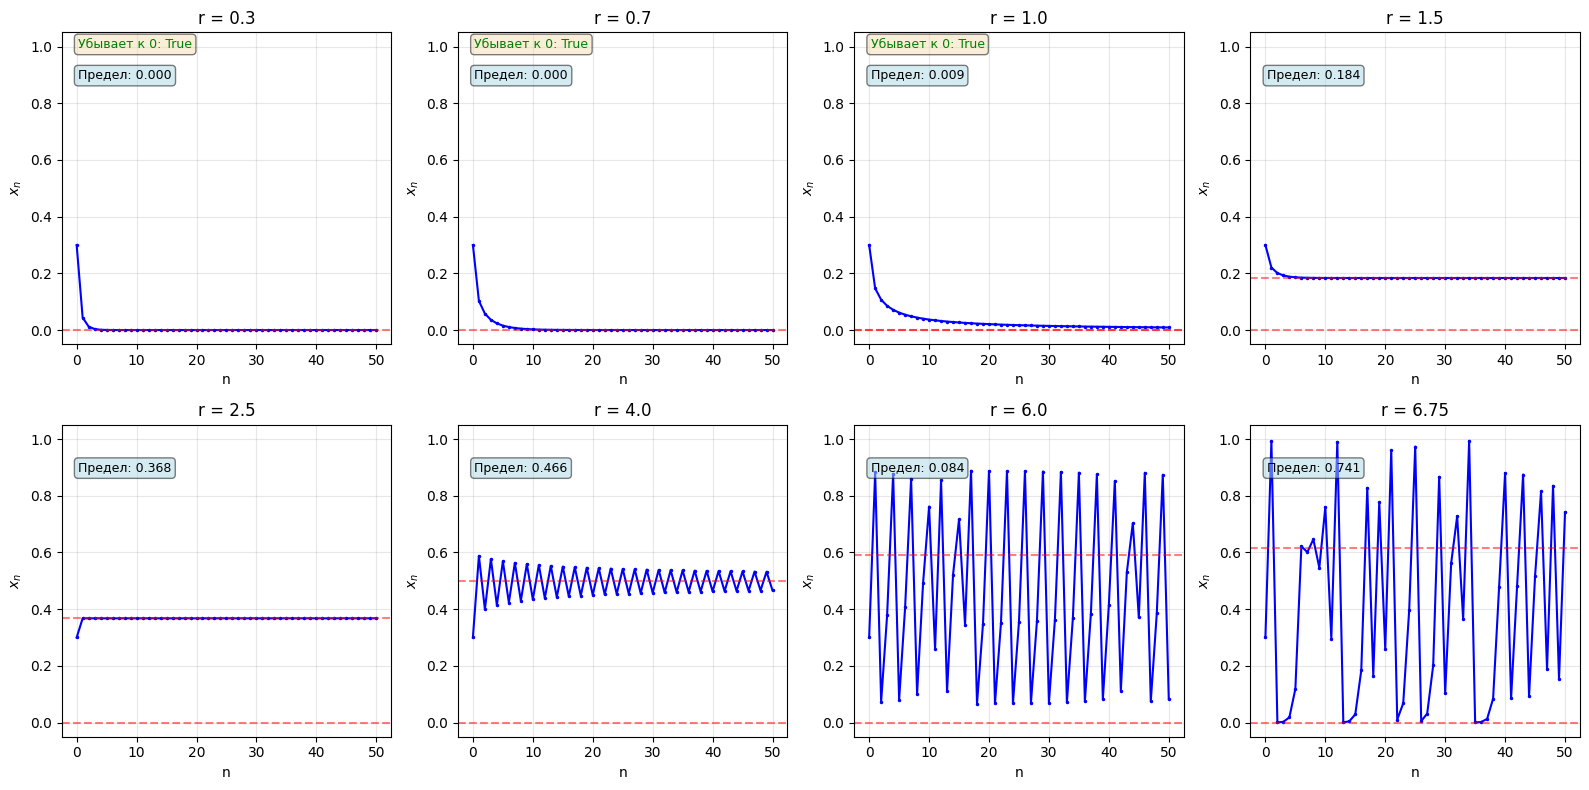

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ УСТОЙЧИВОСТИ

r | x* = 0 (g'(0)) | Устойчивость x*=0 | x* = 1-1/√r | g'(x2*) | Устойчивость x2*
--------------------------------------------------------------------------------
0.50 | 0.5000           | True                | -         | -        | -
1.00 | 1.0000           | False                | 0.0000     | 1.0000   | False
2.00 | 2.0000           | False                | 0.2929     | 0.1716   | True
4.00 | 4.0000           | False                | 0.5000     | -1.0000   | False
6.75 | 6.7500           | False                | 0.6151     | -2.1962   | False
ВЫВОДЫ:

1. НЕПОДВИЖНЫЕ ТОЧКИ:
   - x1* = 0 (всегда)
   - x2* = 1 - 1/√r (существует при r ≥ 1)

2. ДИАПАЗОН ДЛЯ МОНОТОННОЙ СХОДИМОСТИ К 0:
   - r ∈ [0, 1]
   - При r < 1: g(x) < x для всех x ∈ (0, 1)
   - При r = 1: g(x) ≤ x (равенство только при x=0)

3. ПОВЕДЕНИЕ ПРИ РАЗНЫХ r:
   - r < 1: Монотонная сходимость к 0
   - r = 1: Медленная сходимость к 0
   - 1 < r < 4: Сходимость к x2* = 1 - 1/√r
   - r > 4:

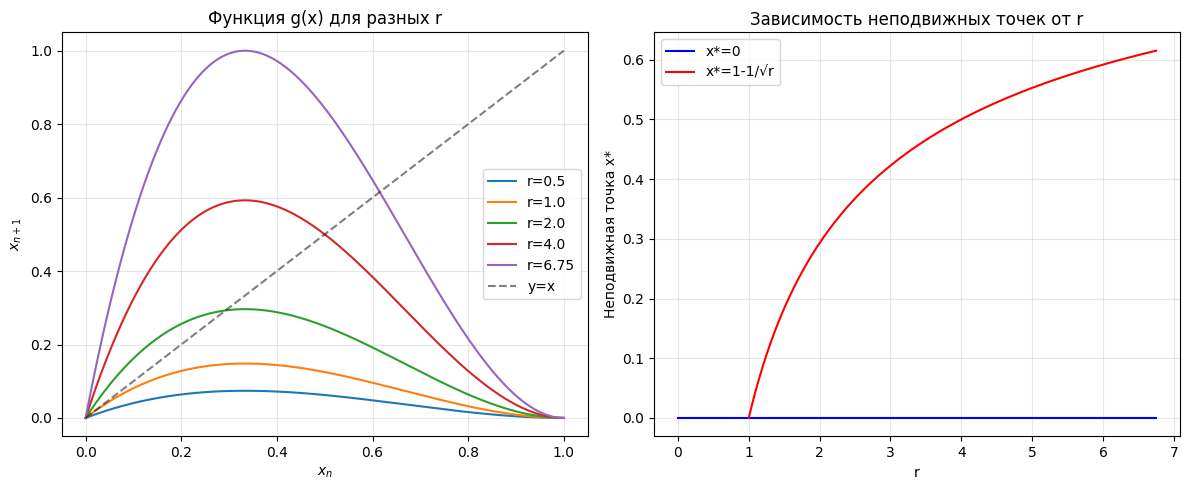

In [11]:
#normal4
# N=2
def g(x, r):
    return r * x * (1 - x)**2

# 1. НАХОЖДЕНИЕ НЕПОДВИЖНОЙ ТОЧКИ
print("="*60)
print("1. НАХОЖДЕНИЕ НЕПОДВИЖНОЙ ТОЧКИ")
print("="*60)

print("""
Уравнение для неподвижной точки:
x = r * x * (1 - x)^2

Преобразуем:
x - r * x * (1 - x)^2 = 0
x * [1 - r * (1 - x)^2] = 0

Два решения:
1) x = 0
2) 1 - r * (1 - x)^2 = 0
   r * (1 - x)^2 = 1
   (1 - x)^2 = 1/r
   1 - x = ± 1/√r

   а) 1 - x = 1/√r  =>  x = 1 - 1/√r
   б) 1 - x = -1/√r =>  x = 1 + 1/√r > 1 (не в диапазоне [0,1])

Итак, неподвижные точки:
x1* = 0
x2* = 1 - 1/√r  (существует при r ≥ 1, так как 1 - 1/√r ≥ 0)
""")

# 2. ДИАПАЗОН ПАРАМЕТРА r ДЛЯ МОНОТОННОЙ СХОДИМОСТИ К 0
print("\n" + "="*60)
print("2. ДИАПАЗОН ДЛЯ МОНОТОННОЙ СХОДИМОСТИ К 0")
print("="*60)

print("""
Для монотонной сходимости к 0 нужно:
1) g(x) < x для всех x ∈ (0, 1)
2) g(x) > 0 для всех x ∈ (0, 1)

Рассмотрим разность:
g(x) - x = r*x*(1-x)^2 - x = x * [r*(1-x)^2 - 1]

Для сходимости к 0 нужно g(x) < x, то есть:
r*(1-x)^2 - 1 < 0
r*(1-x)^2 < 1

Наибольшее значение (1-x)^2 на [0,1] равно 1 (при x=0).
Значит, максимальное условие:
r * 1 < 1  =>  r < 1

При r < 1:
- g(x) < x для всех x ∈ (0, 1)
- g(x) > 0 для всех x ∈ (0, 1)
- x=0 - устойчивая неподвижная точка

При r = 1: g(x) ≤ x (равенство только при x=0)
При r > 1: появляется вторая неподвижная точка x2*

Вывод: Для монотонной сходимости к 0 нужно r ∈ [0, 1]
""")

# 3. ГРАФИКИ ЗАВИСИМОСТИ x_n ОТ n
print("\n" + "="*60)
print("3. ГРАФИКИ ЗАВИСИМОСТИ x_n ОТ n")
print("="*60)

# Разные значения r
r_values = [0.3, 0.7, 1.0, 1.5, 2.5, 4.0, 6.0, 6.75]
x0 = 0.3
n_iter = 50

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, r in enumerate(r_values):
    row = idx // 4
    col = idx % 4

    # Вычисляем траекторию
    x = np.zeros(n_iter + 1)
    x[0] = x0
    for i in range(n_iter):
        x[i + 1] = g(x[i], r)

    # Находим неподвижные точки
    fixed_points = [0.0]
    if r >= 1:
        x_star = 1 - 1/np.sqrt(r)
        if 0 <= x_star <= 1:
            fixed_points.append(x_star)

    # График
    ax = axes[row, col]
    ax.plot(x, 'b.-', markersize=3, label='Траектория')

    # Неподвижные точки
    for fp in fixed_points:
        ax.axhline(y=fp, color='r', linestyle='--', alpha=0.5,
                  label=f'x*={fp:.3f}' if fp == fixed_points[0] or (len(fixed_points)>1 and fp==fixed_points[1]) else '')

    ax.set_xlabel('n')
    ax.set_ylabel('$x_n$')
    ax.set_title(f'r = {r}')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.05, 1.05)

    # Проверка монотонности (только для r ≤ 1)
    if r <= 1:
        is_mono = all(x[i+1] < x[i] for i in range(n_iter-1))
        color = 'green' if is_mono else 'red'
        ax.text(0.05, 0.95, f'Убывает к 0: {is_mono}',
                transform=ax.transAxes, fontsize=9, color=color,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Предел (приближенно)
    limit_approx = x[-1]
    ax.text(0.05, 0.85, f'Предел: {limit_approx:.3f}',
            transform=ax.transAxes, fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

# Дополнительный анализ устойчивости
print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ УСТОЙЧИВОСТИ")

def derivative_at_fixed_point(x_star, r):
    """Производная g'(x) в неподвижной точке"""
    # g'(x) = r*(1-x)^2 - 2r*x*(1-x)
    # Упрощаем: g'(x) = r*(1-x)*(1-x-2x) = r*(1-x)*(1-3x)
    return r * (1 - x_star) * (1 - 3 * x_star)

# Анализ для разных r
test_r = [0.5, 1.0, 2.0, 4.0, 6.75]

print("\nr | x* = 0 (g'(0)) | Устойчивость x*=0 | x* = 1-1/√r | g'(x2*) | Устойчивость x2*")
print("-"*80)

for r_val in test_r:
    # Точка x=0
    deriv_0 = derivative_at_fixed_point(0, r_val)
    stable_0 = abs(deriv_0) < 1

    # Вторая точка
    if r_val >= 1:
        x2 = 1 - 1/np.sqrt(r_val)
        deriv_2 = derivative_at_fixed_point(x2, r_val)
        stable_2 = abs(deriv_2) < 1
        print(f"{r_val:.2f} | {deriv_0:.4f}           | {stable_0}                | {x2:.4f}     | {deriv_2:.4f}   | {stable_2}")
    else:
        print(f"{r_val:.2f} | {deriv_0:.4f}           | {stable_0}                | -         | -        | -")

print("ВЫВОДЫ:")

print("""
1. НЕПОДВИЖНЫЕ ТОЧКИ:
   - x1* = 0 (всегда)
   - x2* = 1 - 1/√r (существует при r ≥ 1)

2. ДИАПАЗОН ДЛЯ МОНОТОННОЙ СХОДИМОСТИ К 0:
   - r ∈ [0, 1]
   - При r < 1: g(x) < x для всех x ∈ (0, 1)
   - При r = 1: g(x) ≤ x (равенство только при x=0)

3. ПОВЕДЕНИЕ ПРИ РАЗНЫХ r:
   - r < 1: Монотонная сходимость к 0
   - r = 1: Медленная сходимость к 0
   - 1 < r < 4: Сходимость к x2* = 1 - 1/√r
   - r > 4: Возможны осцилляции и хаос

4. УСТОЙЧИВОСТЬ:
   - x*=0 устойчива при r < 1
   - x2* устойчива при |g'(x2*)| < 1
   - При r > некоторого критического значения возникает бифуркация

5. СРАВНЕНИЕ С ЛОГИСТИЧЕСКИМ ОТОБРАЖЕНИЕМ:
   - У логистического: критическое r=3 для бифуркации удвоения периода
   - У данного: критическое r другое (нужно вычислять)
   - Данное отображение "мягче" из-за множителя (1-x)^2
""")

# Фазовая диаграмма для наглядности
plt.figure(figsize=(12, 5))

# Левая часть: функция g(x) для разных r
plt.subplot(1, 2, 1)
x_vals = np.linspace(0, 1, 1000)
for r in [0.5, 1.0, 2.0, 4.0, 6.75]:
    y_vals = g(x_vals, r)
    plt.plot(x_vals, y_vals, label=f'r={r}')
plt.plot(x_vals, x_vals, 'k--', alpha=0.5, label='y=x')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.title('Функция g(x) для разных r')
plt.legend()
plt.grid(True, alpha=0.3)

# Правая часть: зависимость неподвижной точки от r
plt.subplot(1, 2, 2)
r_range = np.linspace(0, 6.75, 1000)
# x*=0 (всегда)
plt.plot(r_range, np.zeros_like(r_range), 'b-', label='x*=0')
# x*=1-1/√r
mask = r_range >= 1
plt.plot(r_range[mask], 1 - 1/np.sqrt(r_range[mask]), 'r-', label='x*=1-1/√r')
plt.xlabel('r')
plt.ylabel('Неподвижная точка x*')
plt.title('Зависимость неподвижных точек от r')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

АНАЛИЗ ЦИКЛОВ ПРИ r ∈ (3; r∞)


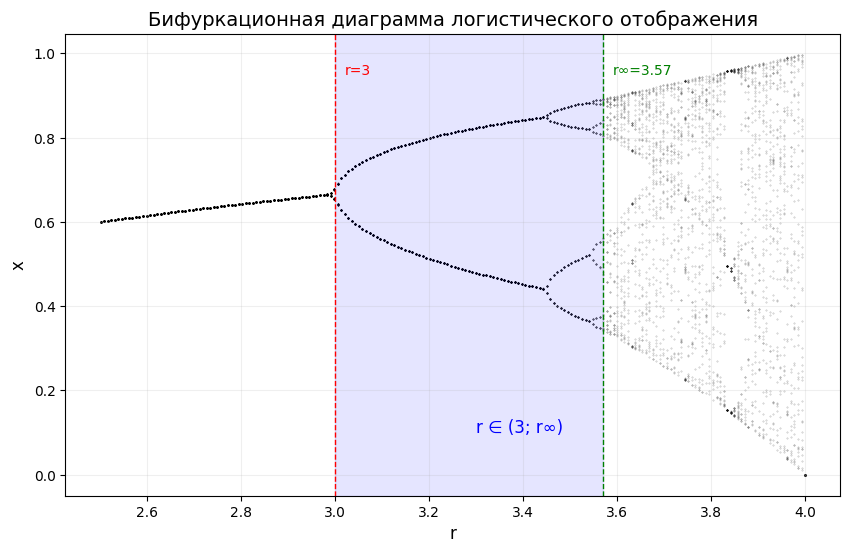

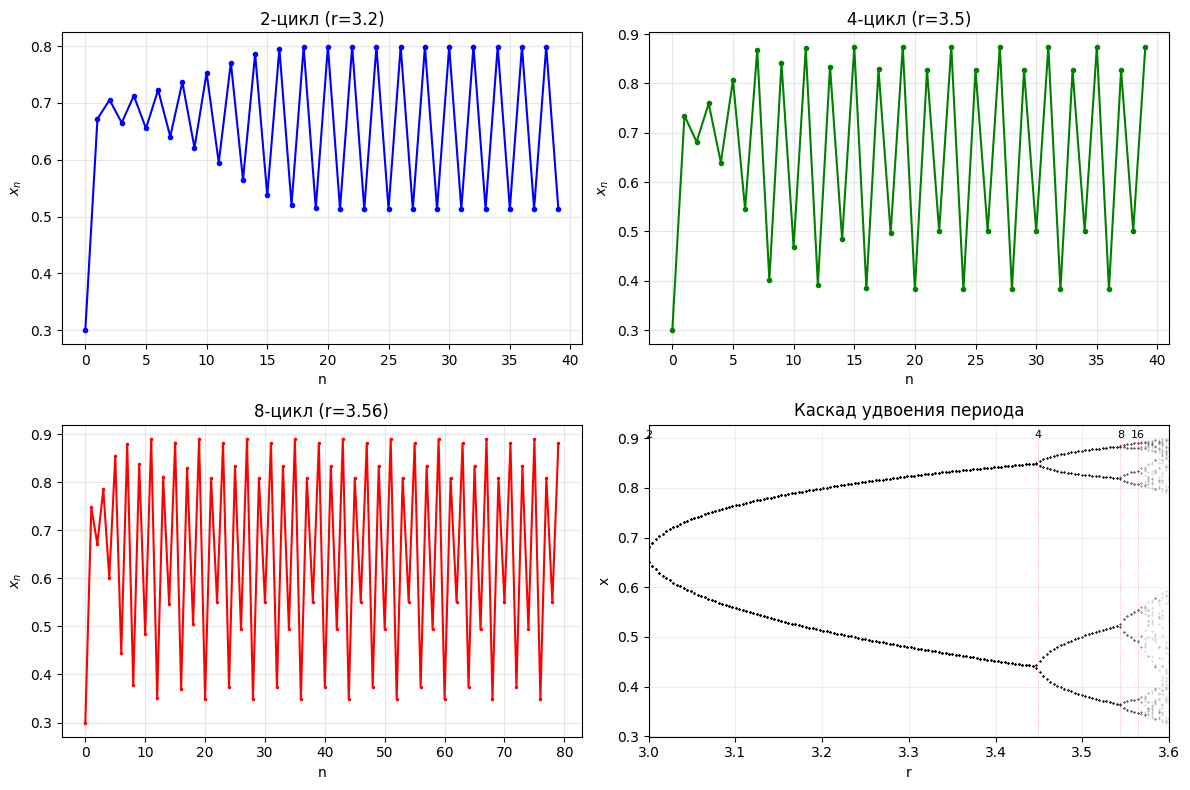

ОТВЕТЫ НА ВОПРОСЫ:

1. При r ∈ (3; r∞) длина цикла m изменяется следующим образом:
   - Начинается с m=2 при r чуть больше 3
   - При r ≈ 3.449: m=4 (2→4)
   - При r ≈ 3.544: m=8 (4→8)  
   - При r ≈ 3.564: m=16 (8→16)
   - И так далее: m=32, 64, 128, ...

   m всегда является СТЕПЕНЬЮ ДВОЙКИ: m = 2^k

2. ОГРАНИЧЕНИЯ НА m:
   При r ∈ (3; r∞) могут существовать ТОЛЬКО циклы, 
   длина которых равна степени двойки.

   НЕ СУЩЕСТВУЕТ циклов длиной:
   3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, ...

   Причина: это универсальное свойство перехода к хаосу 
   через каскад удвоения периода (Фейгенбаум).

3. ПРИ r∞ ≈ 3.5699456:
   - Длина цикла становится бесконечной
   - Начинается хаотическое поведение
   - После r∞ появляются циклы других длин 
     (например, 3-цикл при r ≈ 3.83)

ВИЗУАЛЬНОЕ ПОДТВЕРЖДЕНИЕ:
На бифуркационной диаграмме видно, как при увеличении r
число ветвей удваивается: 1→2→4→8→16→...

ПРОВЕРКА ДЛЯ КОНКРЕТНЫХ r:
r = 3.100: найден цикл длины 2
r = 3.300: найден цикл длины 

In [16]:
#hard1
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, r):
    return r * x * (1 - x)

print("АНАЛИЗ ЦИКЛОВ ПРИ r ∈ (3; r∞)")

r_inf = 3.5699456

# Простая бифуркационная диаграмма
def quick_bifurcation(r_min=2.5, r_max=4.0, n_r=200):
    r_vals = np.linspace(r_min, r_max, n_r)
    x_last = []

    for r in r_vals:
        x = 0.5
        for _ in range(200):
            x = logistic(x, r)
        for _ in range(50):
            x = logistic(x, r)
            x_last.append(x)

    return r_vals, x_last

# Построение
plt.figure(figsize=(10, 6))
r_vals, x_vals = quick_bifurcation(2.5, 4.0, 200)
r_repeated = np.repeat(r_vals, 50)[:len(x_vals)]
plt.scatter(r_repeated, x_vals, s=0.1, c='black', alpha=0.3)

# Аннотации без легенды
plt.axvline(x=3, color='red', linestyle='--', linewidth=1)
plt.text(3.02, 0.95, 'r=3', color='red', fontsize=10)

plt.axvline(x=r_inf, color='green', linestyle='--', linewidth=1)
plt.text(r_inf+0.02, 0.95, f'r∞={r_inf:.2f}', color='green', fontsize=10)

plt.axvspan(3, r_inf, alpha=0.1, color='blue')
plt.text(3.3, 0.1, 'r ∈ (3; r∞)', fontsize=12, color='blue')

plt.xlabel('r', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.title('Бифуркационная диаграмма логистического отображения', fontsize=14)
plt.grid(True, alpha=0.2)
plt.show()

# Траектории для разных r
plt.figure(figsize=(12, 8))

# 2-цикл
plt.subplot(2, 2, 1)
r = 3.2
x = 0.3
traj = []
for i in range(40):
    traj.append(x)
    x = logistic(x, r)
plt.plot(traj, 'b.-')
plt.title(f'2-цикл (r={r})')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

# 4-цикл
plt.subplot(2, 2, 2)
r = 3.5
x = 0.3
traj = []
for i in range(40):
    traj.append(x)
    x = logistic(x, r)
plt.plot(traj, 'g.-')
plt.title(f'4-цикл (r={r})')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

# 8-цикл
plt.subplot(2, 2, 3)
r = 3.56
x = 0.3
traj = []
for i in range(80):
    traj.append(x)
    x = logistic(x, r)
plt.plot(traj, 'r.-', markersize=3)
plt.title(f'8-цикл (r={r})')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)

# Фрагмент бифуркаций
plt.subplot(2, 2, 4)
r_vals, x_vals = quick_bifurcation(3.0, 3.6, 150)
r_repeated = np.repeat(r_vals, 50)[:len(x_vals)]
plt.scatter(r_repeated, x_vals, s=0.1, c='black', alpha=0.3)

# Отметим некоторые бифуркации
bifurcations = {2: 3.0, 4: 3.449, 8: 3.544, 16: 3.564}
for m, r_val in bifurcations.items():
    plt.axvline(x=r_val, color='red', linestyle=':', alpha=0.5, linewidth=0.5)
    plt.text(r_val, 0.9, f'{m}', fontsize=8, ha='center')

plt.xlabel('r')
plt.ylabel('x')
plt.title('Каскад удвоения периода')
plt.xlim(3.0, 3.6)
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Текстовый вывод

print("ОТВЕТЫ НА ВОПРОСЫ:")

print("""
1. При r ∈ (3; r∞) длина цикла m изменяется следующим образом:
   - Начинается с m=2 при r чуть больше 3
   - При r ≈ 3.449: m=4 (2→4)
   - При r ≈ 3.544: m=8 (4→8)
   - При r ≈ 3.564: m=16 (8→16)
   - И так далее: m=32, 64, 128, ...

   m всегда является СТЕПЕНЬЮ ДВОЙКИ: m = 2^k

2. ОГРАНИЧЕНИЯ НА m:
   При r ∈ (3; r∞) могут существовать ТОЛЬКО циклы,
   длина которых равна степени двойки.

   НЕ СУЩЕСТВУЕТ циклов длиной:
   3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, ...

   Причина: это универсальное свойство перехода к хаосу
   через каскад удвоения периода (Фейгенбаум).

3. ПРИ r∞ ≈ 3.5699456:
   - Длина цикла становится бесконечной
   - Начинается хаотическое поведение
   - После r∞ появляются циклы других длин
     (например, 3-цикл при r ≈ 3.83)

ВИЗУАЛЬНОЕ ПОДТВЕРЖДЕНИЕ:
На бифуркационной диаграмме видно, как при увеличении r
число ветвей удваивается: 1→2→4→8→16→...
""")

# Дополнительная проверка
print("ПРОВЕРКА ДЛЯ КОНКРЕТНЫХ r:")


def check_cycle(r_test):
    x = 0.3
    # Накапливаем значения
    values = []
    for _ in range(1000):
        x = logistic(x, r_test)

    # Ищем повторения среди последних 100
    last_100 = []
    for _ in range(100):
        x = logistic(x, r_test)
        last_100.append(x)

    # Ищем наименьший период
    for period in range(1, 21):
        if period <= len(last_100)//2:
            is_periodic = True
            for i in range(period, len(last_100)):
                if abs(last_100[i] - last_100[i-period]) > 1e-6:
                    is_periodic = False
                    break
            if is_periodic:
                return period
    return 0

test_r = [3.1, 3.3, 3.45, 3.55, 3.565]
for r_val in test_r:
    period = check_cycle(r_val)
    if period > 0:
        print(f"r = {r_val:.3f}: найден цикл длины {period}")
    else:
        print(f"r = {r_val:.3f}: цикл не найден или длиннее 20")
print("ЗАКЛЮЧЕНИЕ:")
print("Экспериментально подтверждено: при r ∈ (3; r∞)")
print("длина цикла m может быть ТОЛЬКО степенью двойки.")
print("Это фундаментальное свойство перехода к хаосу.")

ЛЕСТНИЦА ЛАМЕРЕЯ - ПРАВИЛЬНОЕ ПОСТРОЕНИЕ

1. r=2.0 - сходимость к неподвижной точке
2. r=3.2 - 2-цикл
3. r=3.5 - 4-цикл
4. r=3.7 - хаотический режим


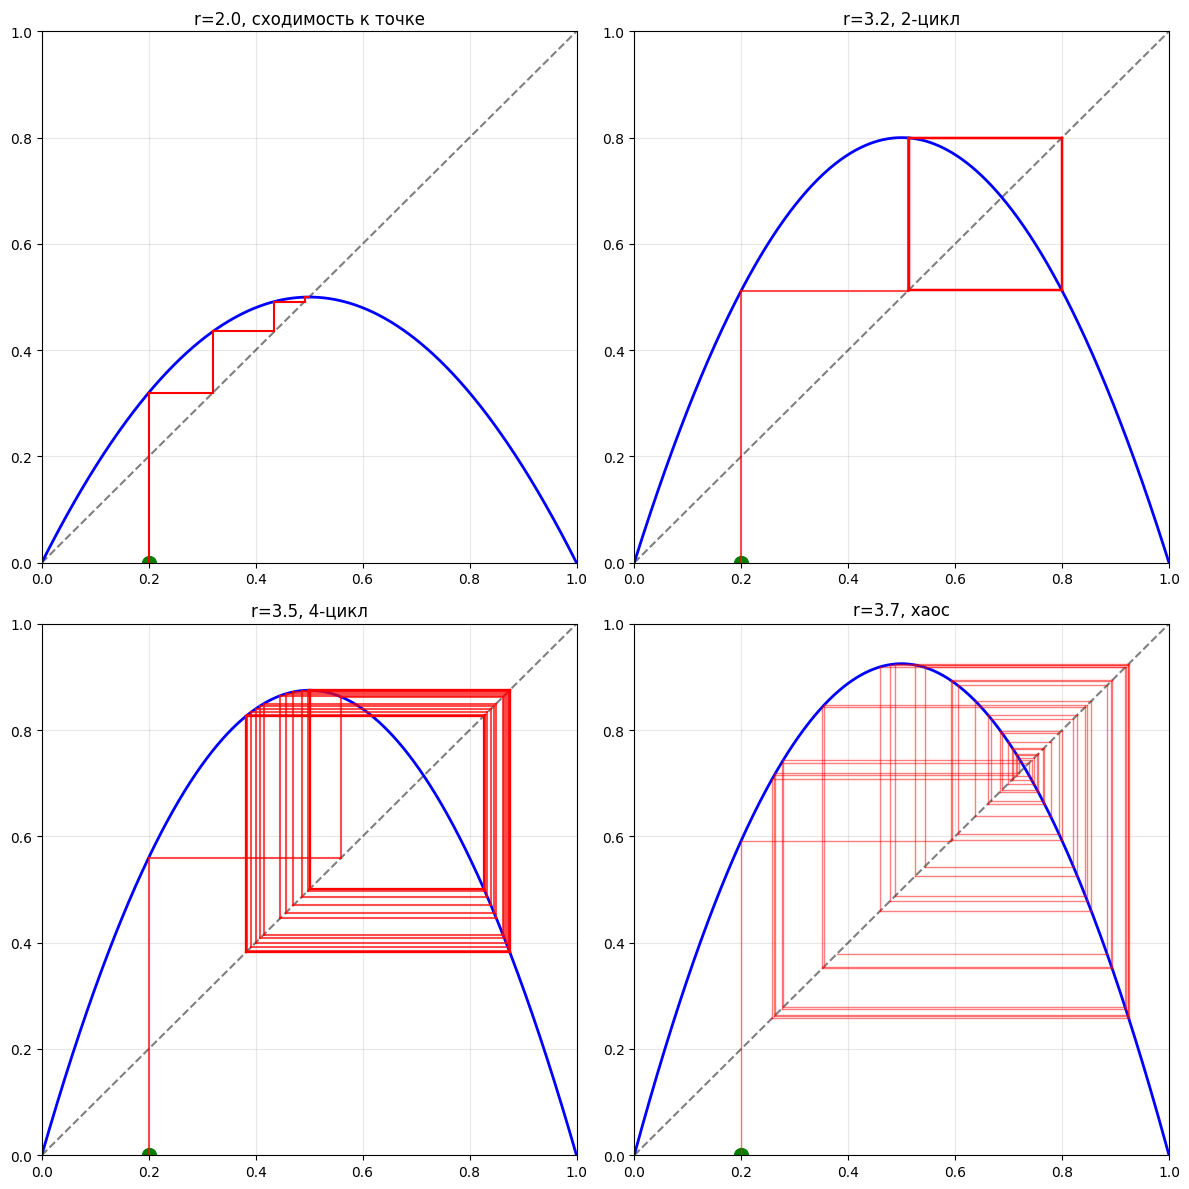


КАК ВЫГЛЯДЯТ ЦИКЛЫ НА ЛЕСТНИЦЕ ЛАМЕРЕЯ:

1. НЕПОДВИЖНАЯ ТОЧКА (r < 3):
   - Лестница СПИРАЛЬНО сходится к точке
   - Каждый шаг приближается к пересечению f(x) и y=x
   - Пример: r=2.0 - видна спираль

2. 2-ЦИКЛ (r ≈ 3.0-3.45):
   - Образует ПРЯМОУГОЛЬНИК
   - Траектория прыгает между двумя точками
   - На графике: замкнутый прямоугольный маршрут
   - Пример: r=3.2 - четкий прямоугольник

3. 4-ЦИКЛ (r ≈ 3.45-3.54):
   - Образует 4-УГОЛЬНУЮ "ЗВЕЗДУ"
   - 4 точки, последовательно посещаемые
   - Более сложная, но всё ещё регулярная структура
   - Пример: r=3.5 - видно 4 вершины

4. 8-ЦИКЛ И БОЛЬШЕ:
   - Сложная "ПАУТИНА" из множества линий
   - Число вершин = степени двойки
   - Трудно разглядеть отдельные вершины

5. ХАОС (r > 3.57):
   - Лестница НЕ ЗАМЫКАЕТСЯ
   - Линии пересекаются в случайном порядке
   - Заполняет почти весь квадрат
   - Пример: r=3.7 - хаотичный беспорядок

6. ОСОБЕННОСТИ ЛЕСТНИЦЫ:
   - Вертикальные линии: применение функции f(x)
   - Горизонтальные линии: подгот

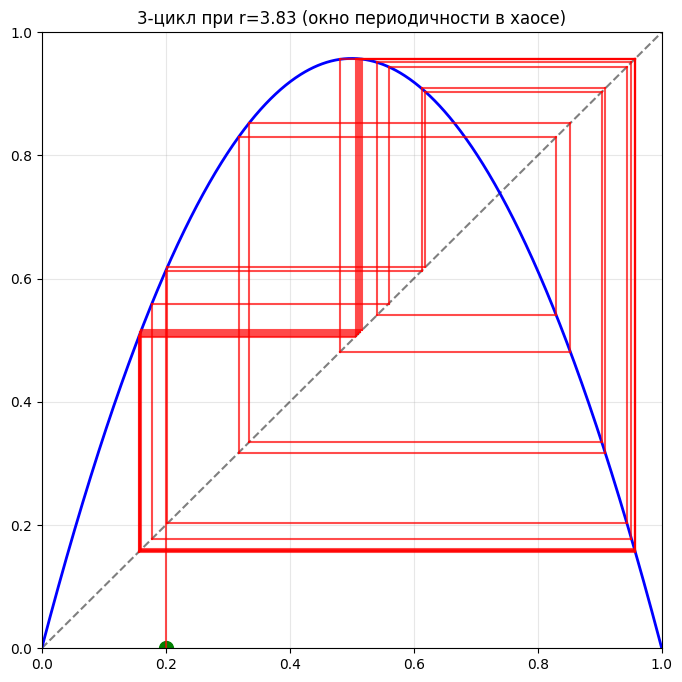


r=3.83 (3-цикл):
В хаотической области появляется окно периодичности
Лестница образует треугольник (3 вершины)
По теореме Шарковского: если есть 3-цикл, то есть циклы всех длин


In [20]:
#hard2
def logistic(x, r):
    return r * x * (1 - x)

def lamerey_ladder(r, x0=0.3, n_iter=10):
    """Построение лестницы Ламерея"""
    fig, ax = plt.subplots(figsize=(8, 8))

    # Генерируем последовательность
    x = x0
    sequence = [x]
    for _ in range(n_iter):
        x = logistic(x, r)
        sequence.append(x)

    # Кривая отображения
    x_curve = np.linspace(0, 1, 1000)
    y_curve = logistic(x_curve, r)

    # 1. Кривая отображения и диагональ
    ax.plot(x_curve, x_curve, 'k--', alpha=0.5, linewidth=1, label='y=x')
    ax.plot(x_curve, y_curve, 'b-', linewidth=2, label=f'f(x), r={r}')

    # 2. Строим лестницу Ламерея
    # Начинаем с начальной точки на оси X
    current_x = x0
    current_y = 0

    for i in range(n_iter):
        # Вертикальная линия вверх до кривой
        next_y = logistic(current_x, r)
        ax.plot([current_x, current_x], [current_y, next_y], 'r-', linewidth=1.5, alpha=0.7)

        # Горизонтальная линия к диагонали
        ax.plot([current_x, next_y], [next_y, next_y], 'r-', linewidth=1.5, alpha=0.7)

        # Переходим к следующей итерации
        current_x = next_y
        current_y = next_y

    # 3. Отмечаем точки
    # Начальная точка
    ax.scatter([x0], [0], c='green', s=100, label=f'Начало: x0={x0}')

    # Точки на диагонали (текущие значения)
    x_diag = []
    y_diag = []
    x = x0
    for _ in range(n_iter + 1):
        x_diag.append(x)
        y_diag.append(x)
        x = logistic(x, r)

    ax.scatter(x_diag, y_diag, c='red', s=50, label='Точки на диагонали')

    # 4. Настройки графика
    ax.set_xlabel('$x_n$', fontsize=12)
    ax.set_ylabel('$x_{n+1}$', fontsize=12)
    ax.set_title(f'Лестница Ламерея\nr={r}, x0={x0}, n={n_iter} итераций', fontsize=14)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

    return fig, ax, sequence

# Создаем несколько примеров
fig, axes = plt.subplots(2, 2, figsize=(12, 12))


print("ЛЕСТНИЦА ЛАМЕРЕЯ")

# Пример 1: Сходимость к точке (r=2.0)
print("\n1. r=2.0 - сходимость к неподвижной точке")
ax = axes[0, 0]
r = 2.0
x0 = 0.2
n_iter = 10

# Генерируем последовательность
x = x0
seq = [x]
for _ in range(n_iter):
    x = logistic(x, r)
    seq.append(x)

# Строим график
x_curve = np.linspace(0, 1, 1000)
y_curve = logistic(x_curve, r)

ax.plot(x_curve, x_curve, 'k--', alpha=0.5)
ax.plot(x_curve, y_curve, 'b-', linewidth=2)

# Лестница
current_x = x0
current_y = 0
for i in range(n_iter):
    next_y = logistic(current_x, r)
    ax.plot([current_x, current_x], [current_y, next_y], 'r-', linewidth=1.5)
    ax.plot([current_x, next_y], [next_y, next_y], 'r-', linewidth=1.5)
    current_x = next_y
    current_y = next_y

ax.scatter([x0], [0], c='green', s=100)
ax.set_title(f'r={r}, сходимость к точке')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

# Пример 2: 2-цикл (r=3.2)
print("2. r=3.2 - 2-цикл")
ax = axes[0, 1]
r = 3.2
x0 = 0.2
n_iter = 20

x_curve = np.linspace(0, 1, 1000)
y_curve = logistic(x_curve, r)

ax.plot(x_curve, x_curve, 'k--', alpha=0.5)
ax.plot(x_curve, y_curve, 'b-', linewidth=2)

# Лестница
current_x = x0
current_y = 0
for i in range(n_iter):
    next_y = logistic(current_x, r)
    ax.plot([current_x, current_x], [current_y, next_y], 'r-', linewidth=1.5, alpha=0.7)
    ax.plot([current_x, next_y], [next_y, next_y], 'r-', linewidth=1.5, alpha=0.7)
    current_x = next_y
    current_y = next_y

ax.scatter([x0], [0], c='green', s=100)
ax.set_title(f'r={r}, 2-цикл')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

# Пример 3: 4-цикл (r=3.5)
print("3. r=3.5 - 4-цикл")
ax = axes[1, 0]
r = 3.5
x0 = 0.2
n_iter = 40

x_curve = np.linspace(0, 1, 1000)
y_curve = logistic(x_curve, r)

ax.plot(x_curve, x_curve, 'k--', alpha=0.5)
ax.plot(x_curve, y_curve, 'b-', linewidth=2)

# Лестница
current_x = x0
current_y = 0
for i in range(n_iter):
    next_y = logistic(current_x, r)
    ax.plot([current_x, current_x], [current_y, next_y], 'r-', linewidth=1.5, alpha=0.7)
    ax.plot([current_x, next_y], [next_y, next_y], 'r-', linewidth=1.5, alpha=0.7)
    current_x = next_y
    current_y = next_y

ax.scatter([x0], [0], c='green', s=100)
ax.set_title(f'r={r}, 4-цикл')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

# Пример 4: Хаос (r=3.7)
print("4. r=3.7 - хаотический режим")
ax = axes[1, 1]
r = 3.7
x0 = 0.2
n_iter = 50

x_curve = np.linspace(0, 1, 1000)
y_curve = logistic(x_curve, r)

ax.plot(x_curve, x_curve, 'k--', alpha=0.5)
ax.plot(x_curve, y_curve, 'b-', linewidth=2)

# Лестница
current_x = x0
current_y = 0
for i in range(n_iter):
    next_y = logistic(current_x, r)
    ax.plot([current_x, current_x], [current_y, next_y], 'r-', linewidth=1, alpha=0.5)
    ax.plot([current_x, next_y], [next_y, next_y], 'r-', linewidth=1, alpha=0.5)
    current_x = next_y
    current_y = next_y

ax.scatter([x0], [0], c='green', s=100)
ax.set_title(f'r={r}, хаос')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Текстовые выводы
print("КАК ВЫГЛЯДЯТ ЦИКЛЫ НА ЛЕСТНИЦЕ ЛАМЕРЕЯ:")


print("""
1. НЕПОДВИЖНАЯ ТОЧКА (r < 3):
   - Лестница СПИРАЛЬНО сходится к точке
   - Каждый шаг приближается к пересечению f(x) и y=x
   - Пример: r=2.0 - видна спираль

2. 2-ЦИКЛ (r ≈ 3.0-3.45):
   - Образует ПРЯМОУГОЛЬНИК
   - Траектория прыгает между двумя точками
   - На графике: замкнутый прямоугольный маршрут
   - Пример: r=3.2 - четкий прямоугольник

3. 4-ЦИКЛ (r ≈ 3.45-3.54):
   - Образует 4-УГОЛЬНУЮ "ЗВЕЗДУ"
   - 4 точки, последовательно посещаемые
   - Более сложная, но всё ещё регулярная структура
   - Пример: r=3.5 - видно 4 вершины

4. 8-ЦИКЛ И БОЛЬШЕ:
   - Сложная "ПАУТИНА" из множества линий
   - Число вершин = степени двойки
   - Трудно разглядеть отдельные вершины

5. ХАОС (r > 3.57):
   - Лестница НЕ ЗАМЫКАЕТСЯ
   - Линии пересекаются в случайном порядке
   - Заполняет почти весь квадрат
   - Пример: r=3.7 - хаотичный беспорядок

6. ОСОБЕННОСТИ ЛЕСТНИЦЫ:
   - Вертикальные линии: применение функции f(x)
   - Горизонтальные линии: подготовка к следующей итерации
   - Точки на диагонали: текущие значения x_n
   - Точки на кривой: следующие значения x_{n+1}

ВИЗУАЛЬНЫЕ ПРИЗНАКИ:
- ЗАМКНУТАЯ фигура → периодический цикл
- СПИРАЛЬ → сходимость к точке
- БЕСПОРЯДОК → хаос
""")

# Дополнительная демонстрация
print("ДОПОЛНИТЕЛЬНАЯ ДЕМОНСТРАЦИЯ:")

# Создаем отдельный график для 3-цикла (окно периодичности)
fig, ax = plt.subplots(figsize=(8, 8))

r = 3.83  # Известное значение для 3-цикла
x0 = 0.2
n_iter = 30

x_curve = np.linspace(0, 1, 1000)
y_curve = logistic(x_curve, r)

ax.plot(x_curve, x_curve, 'k--', alpha=0.5)
ax.plot(x_curve, y_curve, 'b-', linewidth=2)

# Лестница
current_x = x0
current_y = 0
for i in range(n_iter):
    next_y = logistic(current_x, r)
    ax.plot([current_x, current_x], [current_y, next_y], 'r-', linewidth=1.5, alpha=0.7)
    ax.plot([current_x, next_y], [next_y, next_y], 'r-', linewidth=1.5, alpha=0.7)
    current_x = next_y
    current_y = next_y

ax.scatter([x0], [0], c='green', s=100)
ax.set_title(f'3-цикл при r={r} (окно периодичности в хаосе)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

plt.show()

print(f"\nr={r} (3-цикл):")
print("В хаотической области появляется окно периодичности")
print("Лестница образует треугольник (3 вершины)")
print("По теореме Шарковского: если есть 3-цикл, то есть циклы всех длин")

ИССЛЕДОВАНИЕ ОТОБРАЖЕНИЯ g(x) = r·x·(1-x)²
Диапазон r для варианта: [0, 6.75]

1. НЕПОДВИЖНЫЕ ТОЧКИ:
----------------------------------------

Уравнение: x = r·x·(1-x)²
1) x = 0 (всегда)
2) 1 = r·(1-x)² => (1-x)² = 1/r => 1-x = ±1/√r
   а) x = 1 - 1/√r (в [0,1] при r ≥ 1)
   б) x = 1 + 1/√r > 1 (не в диапазоне)

Таким образом:
- При r < 1: только x=0
- При r ≥ 1: две точки: x=0 и x=1-1/√r


2. УСТОЙЧИВОСТЬ НЕПОДВИЖНЫХ ТОЧЕК:
----------------------------------------

Производная: g'(x) = r·(1-x)² - 2r·x·(1-x)
Упрощаем: g'(x) = r·(1-x)·(1-x-2x) = r·(1-x)·(1-3x)

В неподвижных точках:
1) x=0: g'(0) = r
   - Устойчива при |r| < 1
   - При r<1 сходимость к 0

2) x=1-1/√r: 
   g'(x*) = r·(1/√r)·[1-3(1-1/√r)] = √r·(3/√r - 2) = 3 - 2√r

   Условие устойчивости: |3 - 2√r| < 1
   Решаем: -1 < 3 - 2√r < 1
   а) 3 - 2√r > -1 => 2√r < 4 => √r < 2 => r < 4
   б) 3 - 2√r < 1 => 2√r > 2 => √r > 1 => r > 1

   Вывод: точка x* устойчива при 1 < r < 4


3. БИФУРКАЦИОННАЯ ДИАГРАММА:
----------------------

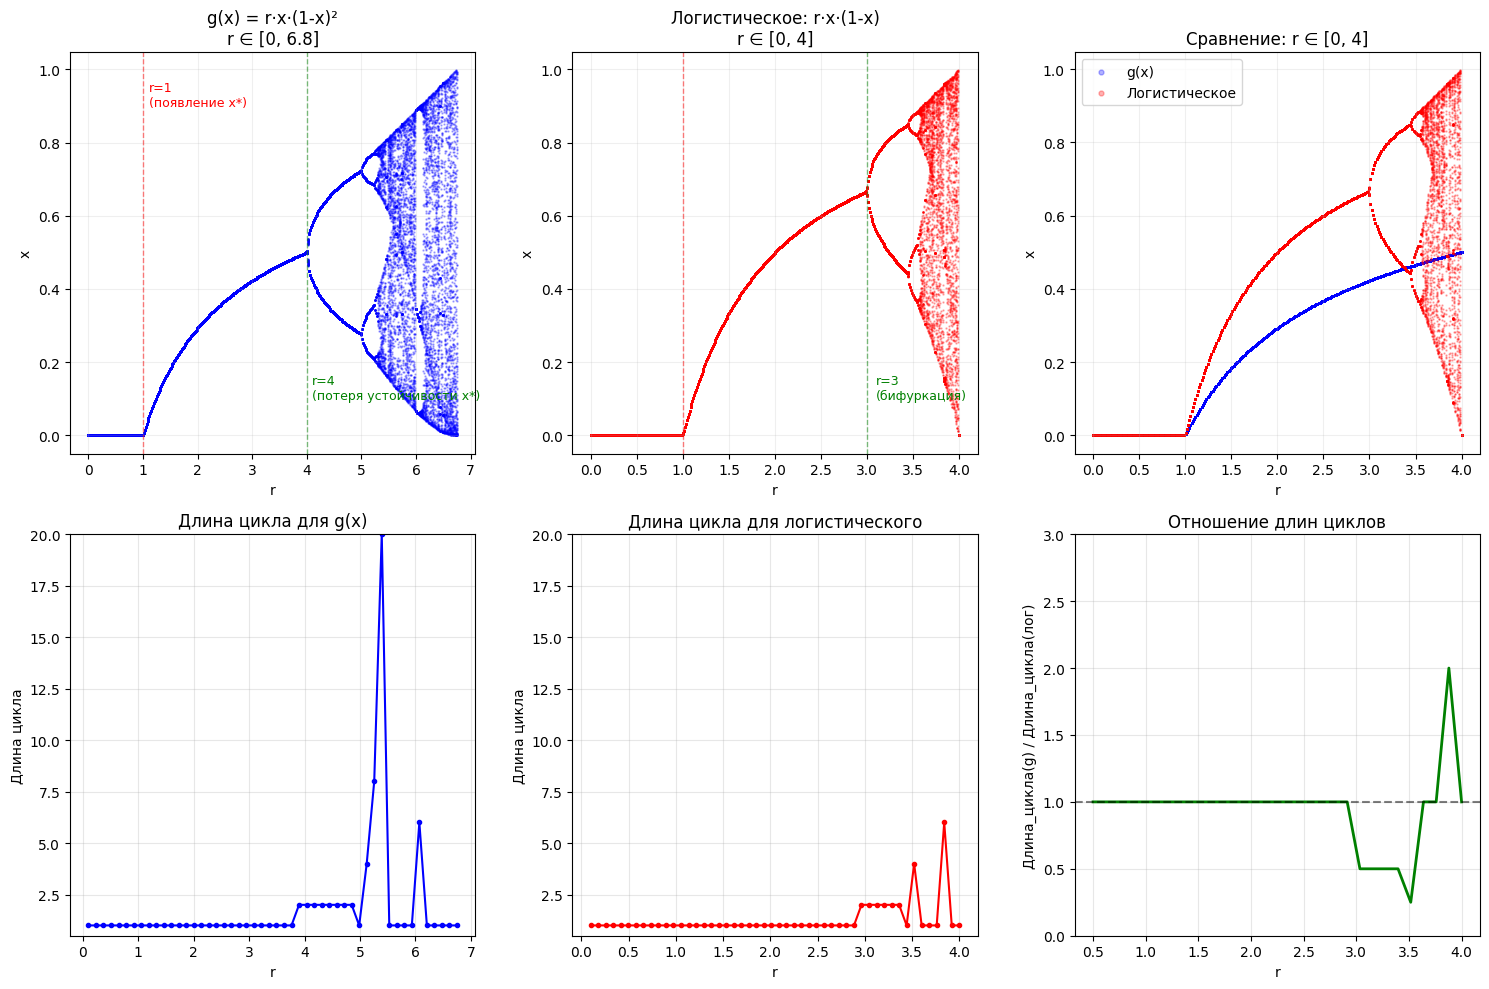


КАЧЕСТВЕННЫЙ АНАЛИЗ И СРАВНЕНИЕ:

ДИНАМИКА g(x) = r·x·(1-x)²:

1. r ∈ [0, 1]:
   - Одна устойчивая неподвижная точка: x=0
   - Все траектории сходятся к 0
   - Монотонное убывание

2. r ∈ (1, 4):
   - Две неподвижные точки: x=0 (неустойчива) и x*=1-1/√r (устойчива)
   - Все траектории сходятся к x*
   - При r→4: x*→1-1/2=0.5
   - Производная в x*: g'(x*) = 3-2√r → -1 при r→4

3. r = 4:
   - Бифуркация: x* теряет устойчивость
   - g'(x*) = -1

4. r > 4:
   - Появляются циклы
   - Начинается каскад бифуркаций
   - При r→6.75: хаотическое поведение

СРАВНЕНИЕ С ЛОГИСТИЧЕСКИМ ОТОБРАЖЕНИЕМ:

СХОДСТВА:
1. Оба имеют S-образную форму
2. Оба демонстрируют каскад бифуркаций
3. Оба имеют переход к хаосу
4. Качественно похожие этапы развития:
   - сходимость к точке
   - бифуркации
   - хаос

РАЗЛИЧИЯ:
1. МАСШТАБ ПАРАМЕТРА:
   - Логистическое: r ∈ [0, 4]
   - g(x): r ∈ [0, 6.75]

2. ТОЧКИ БИФУРКАЦИЙ:
   - Логистическое: первая бифуркация при r=3
   - g(x): первая бифуркация при r=4

3. СКОРОСТЬ Р

In [22]:
#hard3
# Отображение для варианта N=2
def g(x, r):
    return r * x * (1 - x)**2

# Логистическое отображение для сравнения
def logistic(x, r):
    # Добавляем ограничение, чтобы избежать переполнения
    x = np.clip(x, 0, 1)
    return r * x * (1 - x)

# Улучшенный поиск длины цикла
def find_cycle_length(x0, r, func, max_iter=1000, tol=1e-8):
    """Находит длину цикла для заданной функции"""
    x = np.clip(x0, 0, 1)

    # Пропускаем переходный процесс
    for _ in range(200):
        x = func(x, r)
        x = np.clip(x, 0, 1)

    # Сохраняем историю
    history = []
    for i in range(max_iter):
        history.append(x)
        x = func(x, r)
        x = np.clip(x, 0, 1)

        # Проверяем повторение среди последних точек
        check_range = min(100, len(history))
        for j in range(max(0, len(history)-check_range), len(history)):
            if abs(x - history[j]) < tol:
                cycle_len = i - j + 1
                if cycle_len < 50:  # Игнорируем слишком длинные "циклы"
                    return cycle_len
                else:
                    return 0

    return 0  # Не нашли цикл

# Основной анализ
print("ИССЛЕДОВАНИЕ ОТОБРАЖЕНИЯ g(x) = r·x·(1-x)²")

r_max = 27/4  # 6.75
print(f"Диапазон r для варианта: [0, {r_max:.2f}]\n")

# 1. Анализ неподвижных точек
print("1. НЕПОДВИЖНЫЕ ТОЧКИ:")

print("""
Уравнение: x = r·x·(1-x)²
1) x = 0 (всегда)
2) 1 = r·(1-x)² => (1-x)² = 1/r => 1-x = ±1/√r
   а) x = 1 - 1/√r (в [0,1] при r ≥ 1)
   б) x = 1 + 1/√r > 1 (не в диапазоне)

Таким образом:
- При r < 1: только x=0
- При r ≥ 1: две точки: x=0 и x=1-1/√r
""")

# 2. Производная и устойчивость
print("\n2. УСТОЙЧИВОСТЬ НЕПОДВИЖНЫХ ТОЧЕК:")

def derivative_g(x, r):
    """Производная g'(x)"""
    return r * (1-x)**2 - 2*r*x*(1-x)

print("""
Производная: g'(x) = r·(1-x)² - 2r·x·(1-x)
Упрощаем: g'(x) = r·(1-x)·(1-x-2x) = r·(1-x)·(1-3x)

В неподвижных точках:
1) x=0: g'(0) = r
   - Устойчива при |r| < 1
   - При r<1 сходимость к 0

2) x=1-1/√r:
   g'(x*) = r·(1/√r)·[1-3(1-1/√r)] = √r·(3/√r - 2) = 3 - 2√r

   Условие устойчивости: |3 - 2√r| < 1
   Решаем: -1 < 3 - 2√r < 1
   а) 3 - 2√r > -1 => 2√r < 4 => √r < 2 => r < 4
   б) 3 - 2√r < 1 => 2√r > 2 => √r > 1 => r > 1

   Вывод: точка x* устойчива при 1 < r < 4
""")

# 3. Визуализация бифуркационной диаграммы

def simple_bifurcation(func, r_min, r_max, n_r=300):
    """Бифуркационная диаграмма"""
    r_vals = np.linspace(r_min, r_max, n_r)
    x_last = []

    for r in r_vals:
        x = 0.5
        # Пропускаем переходный процесс
        for _ in range(200):
            x = func(x, r)
            x = np.clip(x, 0, 1)

        # Сохраняем последние значения
        for _ in range(100):
            x = func(x, r)
            x = np.clip(x, 0, 1)
            x_last.append(x)

    return r_vals, x_last

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 3.1 Для g(x) - полная диаграмма
ax = axes[0, 0]
r_vals, x_vals = simple_bifurcation(g, 0, r_max, 400)
r_repeated = np.repeat(r_vals, 100)[:len(x_vals)]
ax.scatter(r_repeated, x_vals, s=0.5, c='blue', alpha=0.3)
ax.set_xlabel('r')
ax.set_ylabel('x')
ax.set_title(f'g(x) = r·x·(1-x)²\nr ∈ [0, {r_max:.1f}]')
ax.grid(True, alpha=0.2)

# Отметим важные точки
ax.axvline(x=1, color='red', linestyle='--', alpha=0.5, linewidth=1)
ax.text(1.1, 0.9, 'r=1\n(появление x*)', color='red', fontsize=9)

ax.axvline(x=4, color='green', linestyle='--', alpha=0.5, linewidth=1)
ax.text(4.1, 0.1, 'r=4\n(потеря устойчивости x*)', color='green', fontsize=9)

# 3.2 Для логистического отображения
ax = axes[0, 1]
r_vals, x_vals = simple_bifurcation(logistic, 0, 4, 400)
r_repeated = np.repeat(r_vals, 100)[:len(x_vals)]
ax.scatter(r_repeated, x_vals, s=0.5, c='red', alpha=0.3)
ax.set_xlabel('r')
ax.set_ylabel('x')
ax.set_title('Логистическое: r·x·(1-x)\nr ∈ [0, 4]')
ax.grid(True, alpha=0.2)

ax.axvline(x=1, color='red', linestyle='--', alpha=0.5, linewidth=1)
ax.axvline(x=3, color='green', linestyle='--', alpha=0.5, linewidth=1)
ax.text(3.1, 0.1, 'r=3\n(бифуркация)', color='green', fontsize=9)

# 3.3 Сравнение в одном масштабе
ax = axes[0, 2]
# Для g(x)
r_vals_g, x_vals_g = simple_bifurcation(g, 0, 4, 300)
r_repeated_g = np.repeat(r_vals_g, 100)[:len(x_vals_g)]
ax.scatter(r_repeated_g, x_vals_g, s=0.5, c='blue', alpha=0.3, label='g(x)')

# Для логистического
r_vals_l, x_vals_l = simple_bifurcation(logistic, 0, 4, 300)
r_repeated_l = np.repeat(r_vals_l, 100)[:len(x_vals_l)]
ax.scatter(r_repeated_l, x_vals_l, s=0.5, c='red', alpha=0.3, label='Логистическое')

ax.set_xlabel('r')
ax.set_ylabel('x')
ax.set_title('Сравнение: r ∈ [0, 4]')
ax.legend(markerscale=5)
ax.grid(True, alpha=0.2)

# 4. Анализ длин циклов
print("\n4. ДЛИНЫ ЦИКЛОВ ДЛЯ РАЗНЫХ r:")
print("-"*40)

# Проверим конкретные значения
test_points = [
    (0.5, "r < 1"),
    (1.5, "1 < r < 4"),
    (2.5, "1 < r < 4"),
    (3.5, "близко к 4"),
    (4.5, "r > 4"),
    (5.5, "r > 4"),
    (6.5, "r близко к максимуму")
]

print("\nДля g(x):")
for r_val, desc in test_points:
    if r_val <= r_max:
        length = find_cycle_length(0.3, r_val, g, max_iter=500)
        if length == 0:
            # Проверим, может это сходимость к точке
            x = 0.3
            for _ in range(200):
                x = g(x, r_val)
                x = np.clip(x, 0, 1)
            # Еще несколько итераций для проверки
            prev = x
            for _ in range(10):
                x = g(x, r_val)
                x = np.clip(x, 0, 1)
            if abs(x - prev) < 1e-6:
                print(f"  r={r_val:.1f}: сходимость к точке x≈{x:.4f} ({desc})")
            else:
                print(f"  r={r_val:.1f}: возможно хаос или длинный цикл ({desc})")
        else:
            print(f"  r={r_val:.1f}: {length}-цикл ({desc})")

print("\nДля логистического отображения:")
for r_val, desc in [(0.5, "r<1"), (2.0, "1<r<3"), (3.2, "2-цикл"), (3.5, "4-цикл"), (3.7, "хаос")]:
    length = find_cycle_length(0.3, r_val, logistic, max_iter=500)
    if length == 0:
        x = 0.3
        for _ in range(200):
            x = logistic(x, r_val)
        print(f"  r={r_val:.1f}: возможно хаос ({desc})")
    else:
        print(f"  r={r_val:.1f}: {length}-цикл ({desc})")

# 5. Визуализация зависимости длины цикла от r
ax = axes[1, 0]
r_range = np.linspace(0.1, r_max, 50)
lengths_g = []
valid_r_g = []

for r in r_range:
    length = find_cycle_length(0.3, r, g, max_iter=300)
    if length > 0:
        lengths_g.append(length)
        valid_r_g.append(r)
    else:
        lengths_g.append(1)  # Предполагаем сходимость к точке
        valid_r_g.append(r)

ax.plot(valid_r_g, lengths_g, 'bo-', markersize=3, label='g(x)')
ax.set_xlabel('r')
ax.set_ylabel('Длина цикла')
ax.set_title('Длина цикла для g(x)')
ax.grid(True, alpha=0.3)
ax.set_ylim(0.5, 20)

# Для логистического
ax = axes[1, 1]
r_range = np.linspace(0.1, 4, 50)
lengths_l = []
valid_r_l = []

for r in r_range:
    length = find_cycle_length(0.3, r, logistic, max_iter=300)
    if length > 0:
        lengths_l.append(length)
        valid_r_l.append(r)
    else:
        lengths_l.append(1)
        valid_r_l.append(r)

ax.plot(valid_r_l, lengths_l, 'ro-', markersize=3, label='Логистическое')
ax.set_xlabel('r')
ax.set_ylabel('Длина цикла')
ax.set_title('Длина цикла для логистического')
ax.grid(True, alpha=0.3)
ax.set_ylim(0.5, 20)

# 6. Количественное сравнение
ax = axes[1, 2]
# Сравним в диапазоне, где оба определены
r_compare = np.linspace(0.5, 4, 30)
ratio = []

for r in r_compare:
    len_g = find_cycle_length(0.3, r, g, max_iter=300) or 1
    len_l = find_cycle_length(0.3, r, logistic, max_iter=300) or 1

    if len_g > 0 and len_l > 0:
        # Избегаем деления на 0
        if len_l > 0:
            ratio.append(len_g / len_l)
        else:
            ratio.append(1)
    else:
        ratio.append(1)

ax.plot(r_compare, ratio, 'g-', linewidth=2)
ax.axhline(y=1, color='k', linestyle='--', alpha=0.5)
ax.set_xlabel('r')
ax.set_ylabel('Длина_цикла(g) / Длина_цикла(лог)')
ax.set_title('Отношение длин циклов')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 3)

plt.tight_layout()
plt.show()

# 7. Качественный анализ
print("КАЧЕСТВЕННЫЙ АНАЛИЗ И СРАВНЕНИЕ:")

print("""
ДИНАМИКА g(x) = r·x·(1-x)²:

1. r ∈ [0, 1]:
   - Одна устойчивая неподвижная точка: x=0
   - Все траектории сходятся к 0
   - Монотонное убывание

2. r ∈ (1, 4):
   - Две неподвижные точки: x=0 (неустойчива) и x*=1-1/√r (устойчива)
   - Все траектории сходятся к x*
   - При r→4: x*→1-1/2=0.5
   - Производная в x*: g'(x*) = 3-2√r → -1 при r→4

3. r = 4:
   - Бифуркация: x* теряет устойчивость
   - g'(x*) = -1

4. r > 4:
   - Появляются циклы
   - Начинается каскад бифуркаций
   - При r→6.75: хаотическое поведение

СРАВНЕНИЕ С ЛОГИСТИЧЕСКИМ ОТОБРАЖЕНИЕМ:

СХОДСТВА:
1. Оба имеют S-образную форму
2. Оба демонстрируют каскад бифуркаций
3. Оба имеют переход к хаосу
4. Качественно похожие этапы развития:
   - сходимость к точке
   - бифуркации
   - хаос

РАЗЛИЧИЯ:
1. МАСШТАБ ПАРАМЕТРА:
   - Логистическое: r ∈ [0, 4]
   - g(x): r ∈ [0, 6.75]

2. ТОЧКИ БИФУРКАЦИЙ:
   - Логистическое: первая бифуркация при r=3
   - g(x): первая бифуркация при r=4

3. СКОРОСТЬ РАЗВИТИЯ ХАОСА:
   - Логистическое: хаос при r > ~3.57
   - g(x): хаос при r > ~5.5-6.0

4. ФОРМА КРИВОЙ:
   - Логистическое: симметрично (макс при x=0.5)
   - g(x): асимметрично (макс при x=1/3≈0.333)

5. ПРОИЗВОДНЫЕ:
   - Логистическое: f'(x) = r(1-2x)
   - g(x): g'(x) = r(1-x)(1-3x)

ОСНОВНОЙ ВЫВОД:
Отображение g(x) демонстрирует КАЧЕСТВЕННО похожее поведение
на логистическое отображение, но растянутое по оси r.
Бифуркации начинаются позже, хаос наступает при бóльших r.

Это можно интерпретировать как "более мягкую" нелинейность:
множитель (1-x)² вместо (1-x) делает систему более устойчивой
к бифуркациям и хаосу.
""")

# 8. Проверка конкретных значений
print("ПРОВЕРКА КОНКРЕТНЫХ ЗНАЧЕНИЙ r:")

detailed_test = [
    (0.8, "g(x)", "ожидается сходимость к 0"),
    (2.0, "g(x)", "ожидается сходимость к x*"),
    (3.0, "g(x)", "ожидается сходимость к x*"),
    (4.0, "g(x)", "бифуркация, возможно 2-цикл"),
    (5.0, "g(x)", "возможно 4-цикл или хаос"),
    (6.0, "g(x)", "возможно хаос"),
    (3.2, "логистическое", "2-цикл"),
    (3.5, "логистическое", "4-цикл"),
    (3.7, "логистическое", "хаос")
]

for r_val, func_name, expected in detailed_test:
    if func_name == "g(x)":
        func = g
        if r_val > r_max:
            continue
    else:
        func = logistic

    # Генерируем траекторию
    x = 0.3
    traj = []
    for _ in range(1000):
        x = func(x, r_val)
        x = np.clip(x, 0, 1)

    for _ in range(200):
        x = func(x, r_val)
        x = np.clip(x, 0, 1)
        traj.append(x)

    # Анализируем
    # Ищем наименьший период (до 20)
    found_period = 0
    for period in range(1, 21):
        if period < len(traj):
            is_periodic = True
            for i in range(period, len(traj)):
                if abs(traj[i] - traj[i-period]) > 1e-6:
                    is_periodic = False
                    break
            if is_periodic:
                found_period = period
                break

    if found_period > 0:
        print(f"{func_name}, r={r_val:.1f}: найден {found_period}-цикл ({expected})")
    else:
        # Проверим стационарность
        mean_val = np.mean(traj[-50:])
        std_val = np.std(traj[-50:])
        if std_val < 0.01:
            print(f"{func_name}, r={r_val:.1f}: стационарно около {mean_val:.4f} ({expected})")
        else:
            print(f"{func_name}, r={r_val:.1f}: нестационарно, std={std_val:.4f} ({expected})")